# Comparing evaluation through detection and tracking metrics


#### Requirements
Firts you need to evaluate the outputs of the detectors and trackers with the commands:
```
python evaluation/mAP/main.py
python evaluation/scripts/run_mot_challenge.py --BENCHMARK <dataset_name> --USE_PARALLEL True --NUM_PARALLEL_CORES 4 --TRACKERS_TO_EVAL <tracker_name>
```

And generate a table with all the results. For that use the following command:
```
python evaluation/create_table.py
```

> You might need to use the `eval` environment to run the programs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from IPython.display import display, HTML
from scipy.spatial import distance

import auxiliar as aux
import analysis as anly

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

In [3]:
tb_20 = aux.select_dataset(tb, 'MOT20')
tb_17 = aux.select_dataset(tb, 'MOT17')

In [4]:
tb_20 = aux.select_list(tb_20, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17 = aux.select_list(tb_17, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb = aux.select_list(tb, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_20_sort      = aux.select_list(tb_20, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_deep_sort = aux.select_list(tb_20, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_sst       = aux.select_list(tb_20, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_uma       = aux.select_list(tb_20, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_17_sort      = aux.select_list(tb_17, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_deep_sort = aux.select_list(tb_17, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_sst       = aux.select_list(tb_17, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_uma       = aux.select_list(tb_17, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])


## Detectors evaluation

Basic evaluation information of the detectors used.

In [5]:
tb_20_sort.groupby('Detector').mean()

mAP   Precision     Recall         TP        FP  \
Detector                                                                        
faster_rcnn             50.014541   92.510294  34.969783  143924.00  33218.00   
faster_rcnn-fine-tune   69.750049   99.146504  47.842493  179473.50  23403.00   
faster_rcnn-mod-1       31.869323   96.318639  21.364013   97518.50  23601.50   
faster_rcnn-mod-2       42.985582   96.813021  24.745129  122450.25  13676.50   
faster_rcnn-mod-3       19.978839   87.896000  13.468748   47128.50  12696.50   
faster_rcnn-mod-4        5.947220   99.720226   2.991582    8111.25     58.75   
gt                     100.000000  100.000000  50.001295  318609.75      0.00   
public                  52.575443   99.385879  26.443929  164085.00   1200.75   

                       GT detections         FN   HOTA(0)   LocA(0)  \
Detector                                                              
faster_rcnn                318609.75  174685.75  0.385168  0.669104   
faster_rcnn-fine-tune      318609.75  139136.25  0.400142  0.780929   
faster_rcnn-mod-1          318609.75  221091.25  0.205523  0.683618   
faster_rcnn-mod-2          318609.75  196159.50  0.349791  0.709164   
faster_rcnn-mod-3          318609.75  271481.25  0.130403  0.744163   
faster_rcnn-mod-4          318609.75  310498.50  0.078393  0.807986   
gt                         318609.75       0.00  0.994169  0.979074   
public                     318609.75  154524.75  0.400296  0.886560   

                       HOTALocA(0)  ...      Nd      Nt      Id      It  \
Detector                            ...                                   
faster_rcnn               0.255475  ...  0.7200  0.6125  0.5950  0.6500   
faster_rcnn-fine-tune     0.311026  ...  0.6525  0.6875  0.7675  0.7600   
faster_rcnn-mod-1         0.140219  ...  0.4575  0.3225  0.6025  0.6625   
faster_rcnn-mod-2         0.248094  ...  0.5250  0.4475  0.6750  0.7050   
faster_rcnn-mod-3         0.097205  ...  0.3250  0.2075  0.6225  0.7200   
faster_rcnn-mod-4         0.064383  ...  0.0650  0.0450  0.8225  0.8425   
gt                        0.973365  ...  1.0000  0.9975  1.0000  0.9800   
public                    0.355866  ...  0.5425  0.4925  0.8875  0.8950   

                       Einter    Id.1    It.1       Y       C  IDSW_score  
Detector                                                                   
faster_rcnn            0.7650  0.7800  0.8800  0.1000  0.7275      0.9250  
faster_rcnn-fine-tune  0.7775  0.8000  0.8850  0.0850  0.7875      0.9000  
faster_rcnn-mod-1      0.5475  0.7500  0.8700  0.1175  0.4650      0.9250  
faster_rcnn-mod-2      0.6425  0.8350  0.8975  0.0625  0.5975      0.9650  
faster_rcnn-mod-3      0.3600  0.7825  0.8700  0.0875  0.3125      0.8700  
faster_rcnn-mod-4      0.1350  0.8850  0.9400  0.0525  0.0850      0.9650  
gt                     0.9975  0.9500  0.9500  0.0000  0.9975      1.0000  
public                 0.6675  0.8950  0.9250  0.0325  0.6525      0.9775  

[8 rows x 303 columns]

In [6]:
tb_17_sort.groupby('Detector').mean()

mAP   Precision     Recall            TP  \
Detector                                                                 
faster_rcnn             60.607164   56.573747  61.649705  13500.571429   
faster_rcnn-fine-tune   75.201363   54.641942  73.676070  16220.000000   
faster_rcnn-mod-1       41.869426   59.129262  42.514467   9098.142857   
faster_rcnn-mod-2       55.669865   93.548563  42.179724  11186.571429   
faster_rcnn-mod-3       42.699252   82.314060  36.783137   8374.285714   
faster_rcnn-mod-4       30.366657   98.008907  15.724923   4454.142857   
gt                     100.000000  100.000000  50.006637  20997.000000   
public                  47.279869   99.958869  25.503740   9127.857143   

                                 FP  GT detections            FN   HOTA(0)  \
Detector                                                                     
faster_rcnn            23330.000000        20997.0   7496.428571  0.412000   
faster_rcnn-fine-tune  28605.428571        20997.0   4777.000000  0.368528   
faster_rcnn-mod-1      15197.428571        20997.0  11898.857143  0.322796   
faster_rcnn-mod-2       4731.857143        20997.0   9810.428571  0.498595   
faster_rcnn-mod-3       5522.285714        20997.0  12622.714286  0.233249   
faster_rcnn-mod-4        173.142857        20997.0  16542.857143  0.328937   
gt                         0.000000        20997.0      0.000000  0.908861   
public                   534.857143        20997.0  11869.142857  0.485636   

                        LocA(0)  HOTALocA(0)  ...        Nd        Nt  \
Detector                                      ...                       
faster_rcnn            0.672423     0.279810  ...  0.505714  0.737143   
faster_rcnn-fine-tune  0.698508     0.260136  ...  0.387143  0.564286   
faster_rcnn-mod-1      0.658551     0.212962  ...  0.582857  0.700000   
faster_rcnn-mod-2      0.730611     0.365981  ...  0.772857  0.691429   
faster_rcnn-mod-3      0.743157     0.173181  ...  0.668571  0.537143   
faster_rcnn-mod-4      0.813453     0.268191  ...  0.338571  0.297143   
gt                     0.949629     0.863610  ...  1.000000  0.978571   
public                 0.857514     0.416808  ...  0.517143  0.462857   

                             Id        It    Einter      Id.1      It.1  \
Detector                                                                  
faster_rcnn            0.597143  0.564286  0.802857  0.645714  0.784286   
faster_rcnn-fine-tune  0.697143  0.667143  0.720000  0.630000  0.760000   
faster_rcnn-mod-1      0.465714  0.468571  0.755714  0.637143  0.797143   
faster_rcnn-mod-2      0.611429  0.661429  0.811429  0.778571  0.854286   
faster_rcnn-mod-3      0.592857  0.688571  0.587143  0.761429  0.838571   
faster_rcnn-mod-4      0.824286  0.830000  0.430000  0.874286  0.901429   
gt                     1.000000  0.952857  0.982857  0.882857  0.890000   
public                 0.838571  0.860000  0.622857  0.852857  0.881429   

                              Y         C  IDSW_score  
Detector                                               
faster_rcnn            0.138571  0.844286    0.792857  
faster_rcnn-fine-tune  0.130000  0.720000    0.825714  
faster_rcnn-mod-1      0.161429  0.795714    0.750000  
faster_rcnn-mod-2      0.077143  0.787143    0.932857  
faster_rcnn-mod-3      0.075714  0.641429    0.807143  
faster_rcnn-mod-4      0.025714  0.412857    0.981429  
gt                     0.004286  0.978571    1.000000  
public                 0.028571  0.604286    0.981429  

[8 rows x 303 columns]

## Comparing detector and tracker outputs

Each detector and tracker applies different and various techniques to do their work. In this section we study the associative between trackers ussing different detectors outputs and the same ones.

In [7]:
aux.search(tb, 'uma', 'gt')

Tracker Detector Dataset name    Set id    mAP  Precision     Recall  \
49      uma       gt        MOT17  MOT17-02  100.0      100.0  50.003709   
50      uma       gt        MOT17  MOT17-04  100.0      100.0  50.000758   
51      uma       gt        MOT17  MOT17-05  100.0      100.0  50.012897   
52      uma       gt        MOT17  MOT17-09  100.0      100.0  50.008563   
53      uma       gt        MOT17  MOT17-10  100.0      100.0  50.007022   
54      uma       gt        MOT17  MOT17-11  100.0      100.0  50.010506   
55      uma       gt        MOT17  MOT17-13  100.0      100.0  50.003001   
416     uma       gt        MOT20  MOT20-01  100.0      100.0  50.004456   
417     uma       gt        MOT20  MOT20-02  100.0      100.0  50.000294   
418     uma       gt        MOT20  MOT20-03  100.0      100.0  50.000296   
419     uma       gt        MOT20  MOT20-05  100.0      100.0  50.000134   

         TP  FP  GT detections  ...   Nd    Nt   Id    It  Einter  Id.1  It.1  \
49    26960   0          26960  ...  1.0  0.95  1.0  0.86    0.88  0.97  0.92   
50    66005   0          66005  ...  1.0  0.94  1.0  0.90    0.96  0.98  0.97   
51     7754   0           7754  ...  1.0  0.93  1.0  0.87    0.90  0.85  0.84   
52     5839   0           5839  ...  1.0  0.94  1.0  0.87    0.91  0.93  0.91   
53    14240   0          14240  ...  1.0  0.97  1.0  0.86    0.96  0.83  0.82   
54     9518   0           9518  ...  1.0  0.96  1.0  0.86    0.95  0.91  0.89   
55    16663   0          16663  ...  1.0  0.96  1.0  0.86    0.96  0.71  0.71   
416   22444   0          22444  ...  1.0  0.98  1.0  0.87    0.96  0.94  0.93   
417  169891   0         169891  ...  1.0  0.98  1.0  0.87    0.96  0.95  0.94   
418  337404   0         337404  ...  1.0  0.98  1.0  0.86    0.97  0.95  0.94   
419  744700   0         744700  ...  1.0  0.98  1.0  0.86    0.97  0.96  0.95   

        Y     C  IDSW_score  
49  -0.05  0.97        0.95  
50  -0.01  0.97        1.00  
51  -0.02  0.96        0.95  
52  -0.02  0.97        0.96  
53  -0.01  0.98        0.98  
54  -0.01  0.98        0.99  
55  -0.00  0.98        0.99  
416 -0.01  0.99        0.98  
417 -0.02  0.99        0.98  
418 -0.01  0.99        0.99  
419 -0.02  0.99        0.99  

[11 rows x 307 columns]

## Comparing metrics

Metrics are used to score detectors and trackers, while deciding which ones perform better in the given scenarios. In this section we want to study the correlation between metrics and see if there is any case where the metrics are similar.

As we can see in the matrix of results there are some interesting results we want to discuss.

In detection metrics, *mAP* and *Recall* are high correlated.
 - precision and recall mostly opposite.
 - Precision and FP are opposite -> following the precision formula it has sense.
 - Recall and mAP are opposite of FN -> With the formula it has sense.
 
Tracking metrics:
 - HOTA and IDF1 are very similar. ATA is also similar to both.
 - MOTP is more similar to ATA than to MOTA.
 - MOTA is the opposite of IDSW -> ????

Mixed:
 - IDSW is similar to FP.
 - HOTA has a direct relation with mAP.
 - MOTA has a direct relation with Precision.

# Correlation matix wil ALL

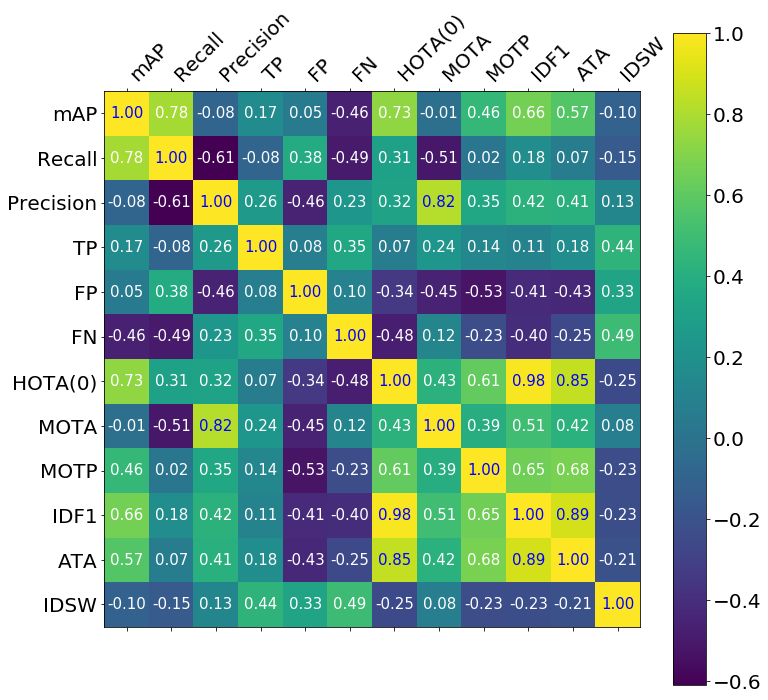

In [8]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix.png')

# MOT17

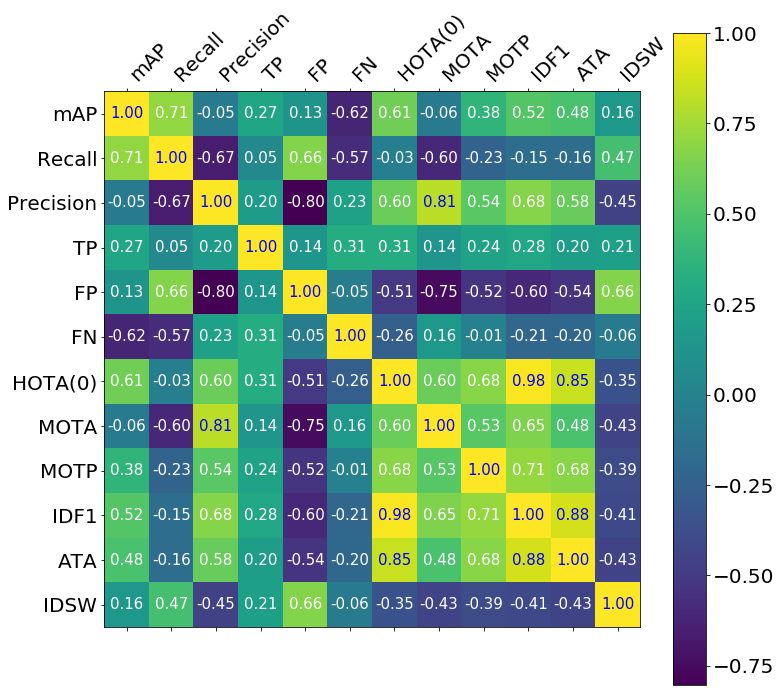

In [9]:
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT17.png')

### Matrix for each tracker (MOT17)

SORT


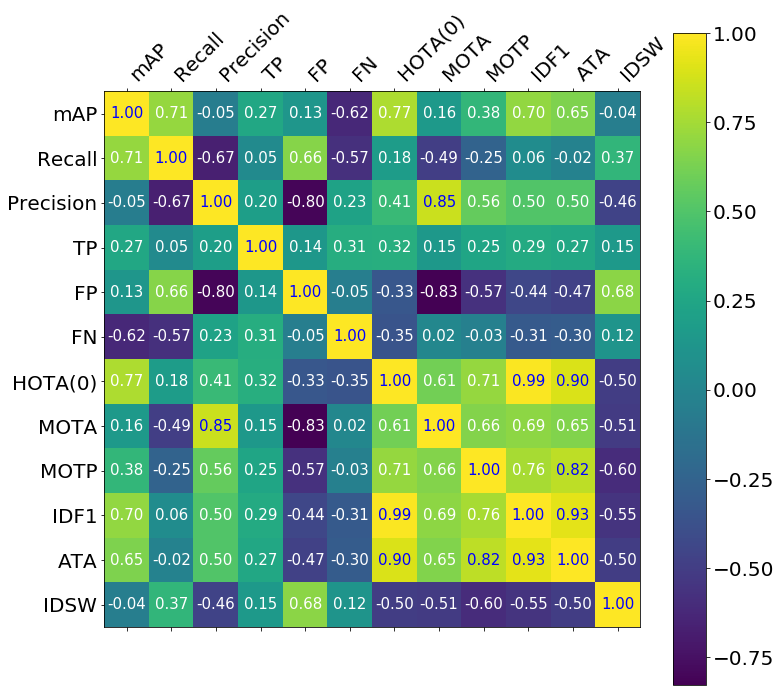

DEEP_SORT


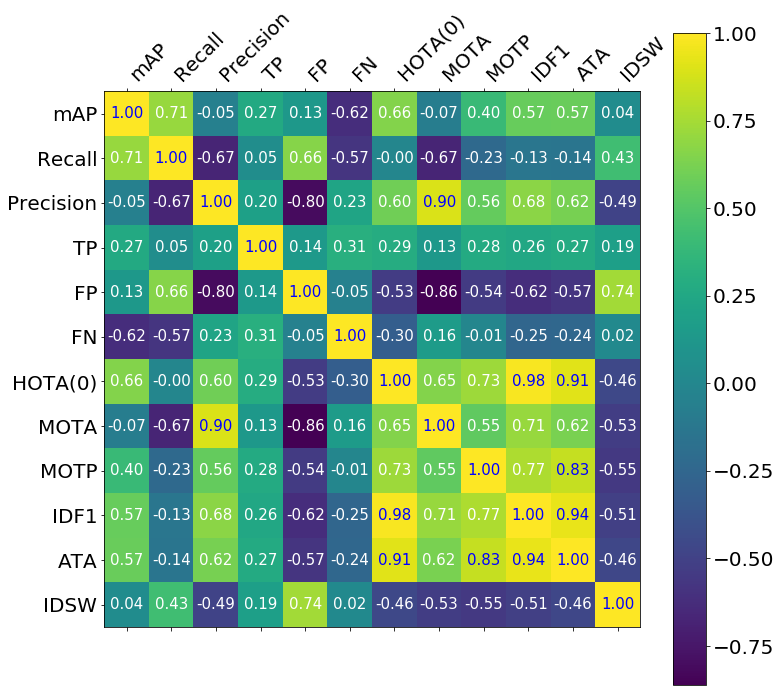

SST


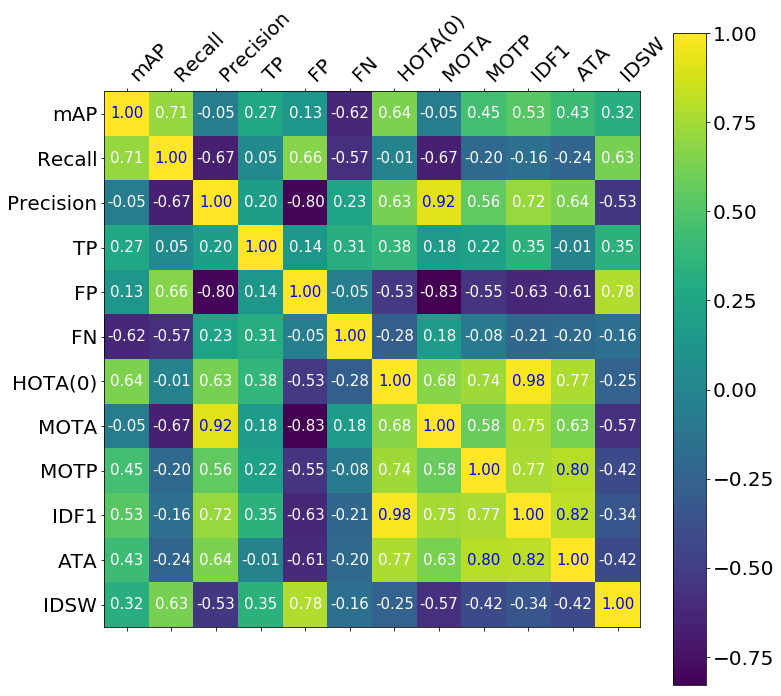

UMA


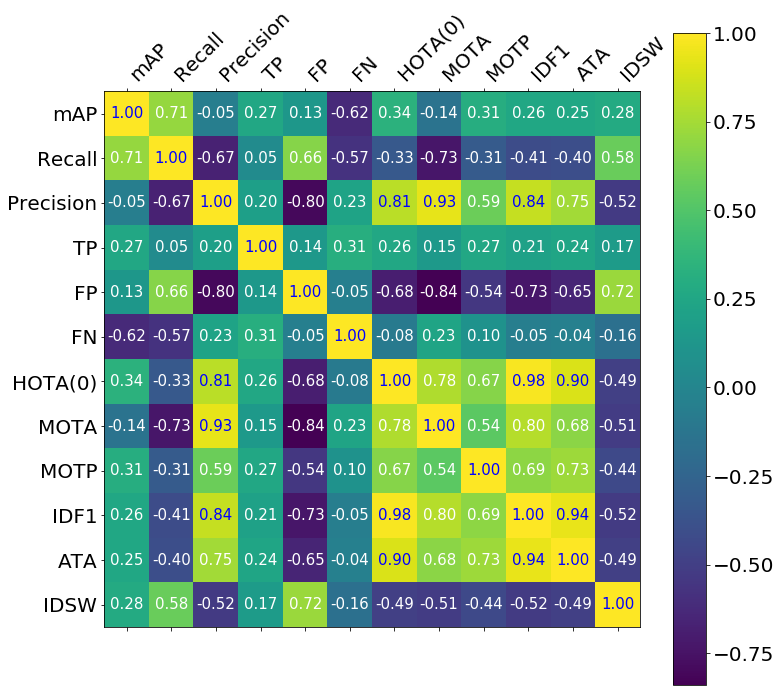

In [10]:
for trk in tb_17['Tracker'].unique():
    
    tb_search = aux.search(tb_17, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT17_' + trk + '.png')

# MOT20

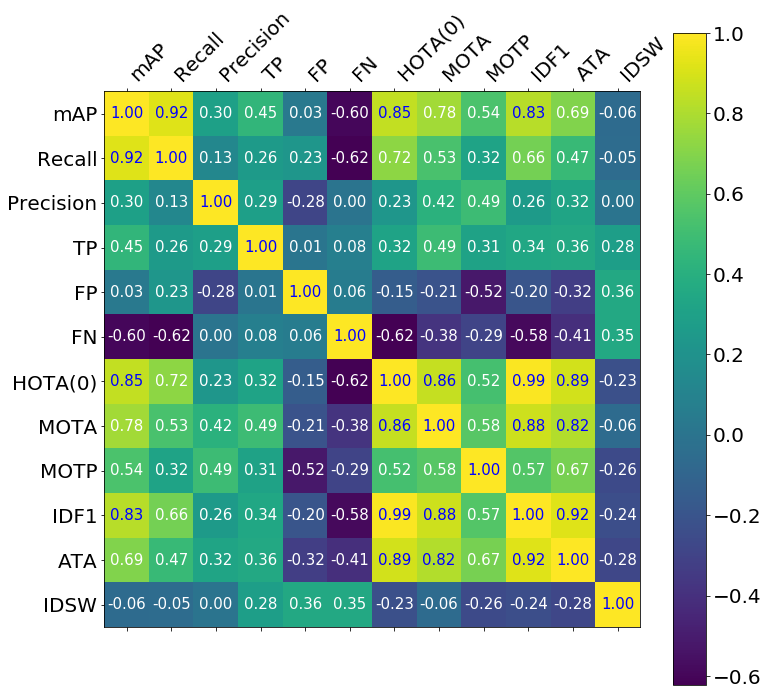

In [11]:
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT20.png')

### Matrix for each tracker (MOT20)

SORT


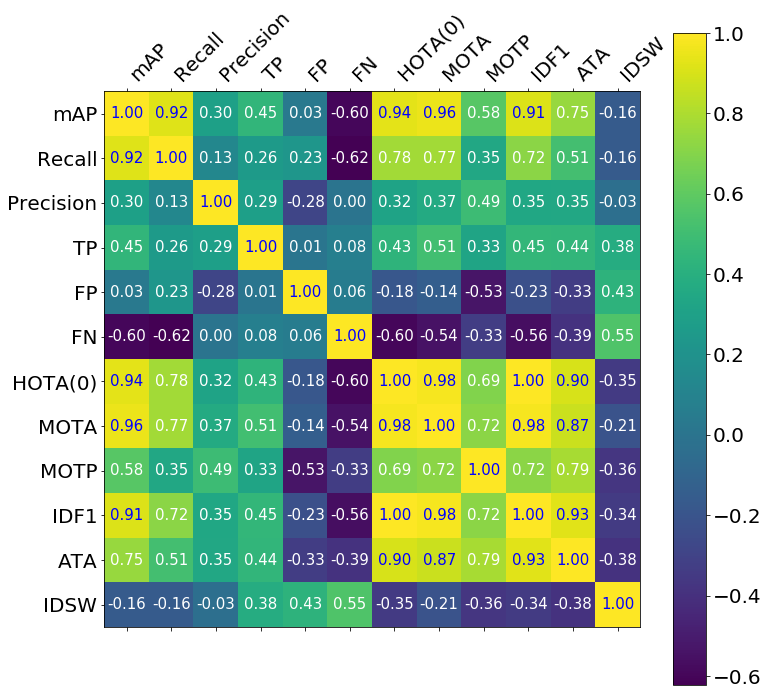

DEEP_SORT


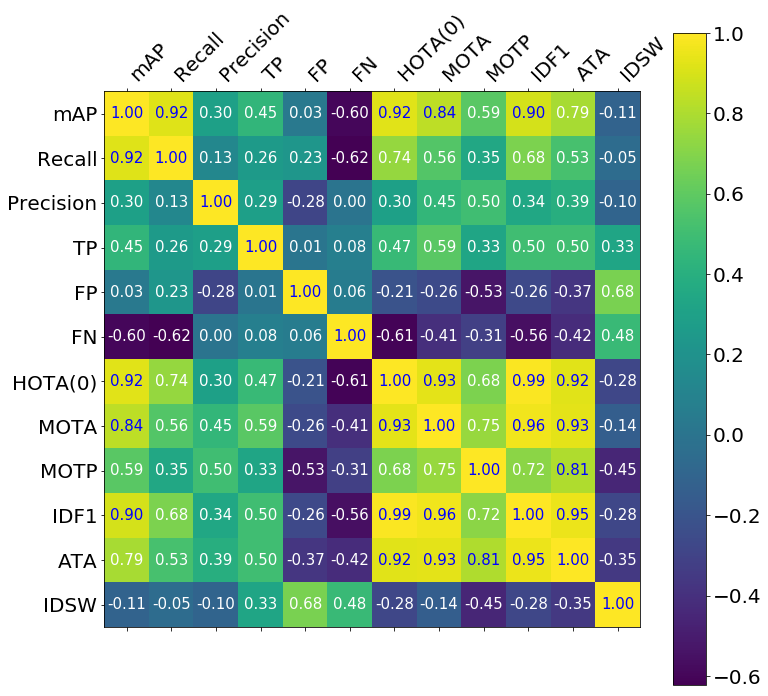

SST


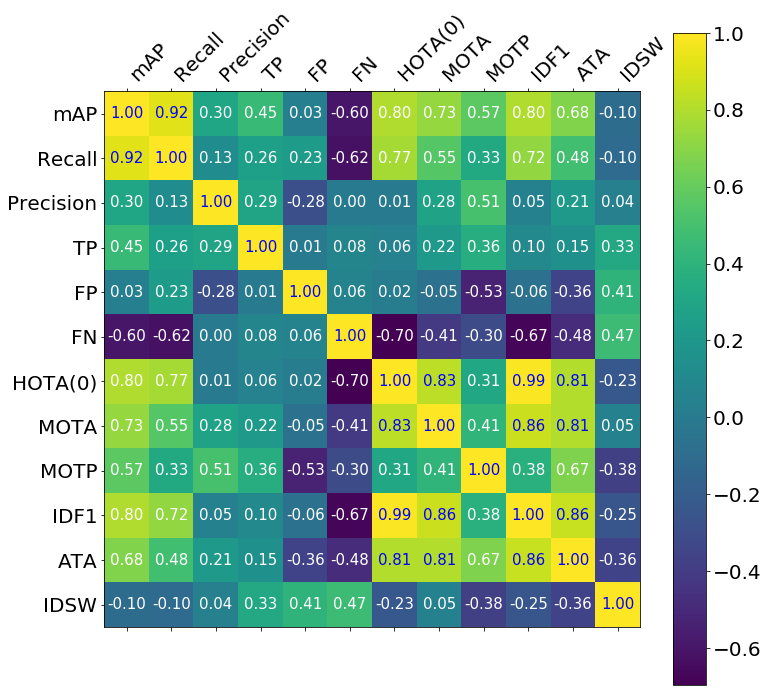

UMA


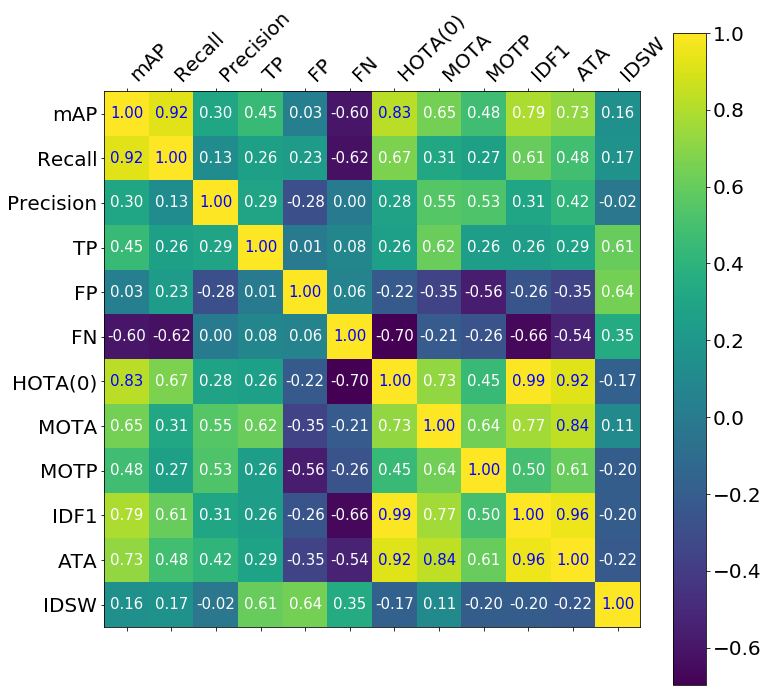

In [12]:
for trk in tb_20['Tracker'].unique():
    
    tb_search = aux.search(tb_20, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT20_' + trk + '.png')

# New metric experiments

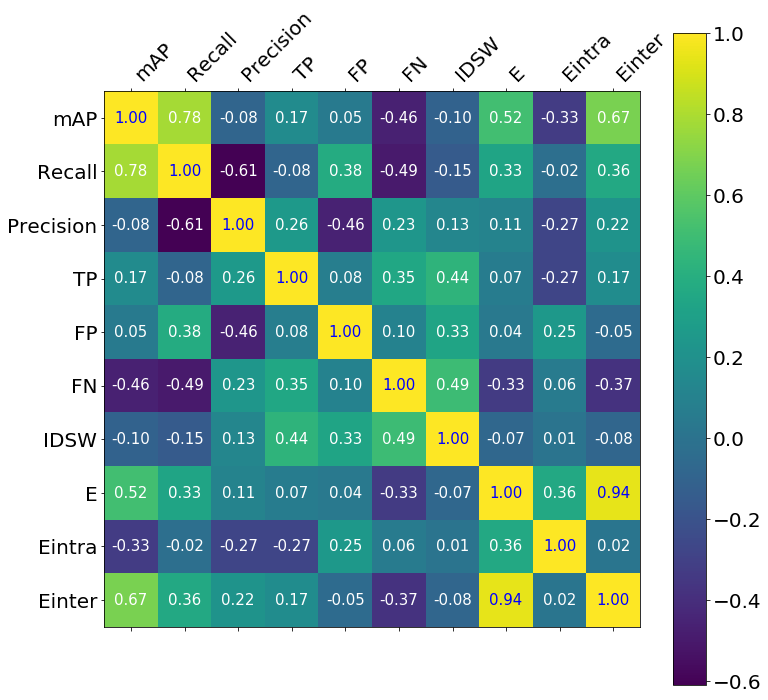

In [13]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'E', 'Eintra', 'Einter']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_1.png')

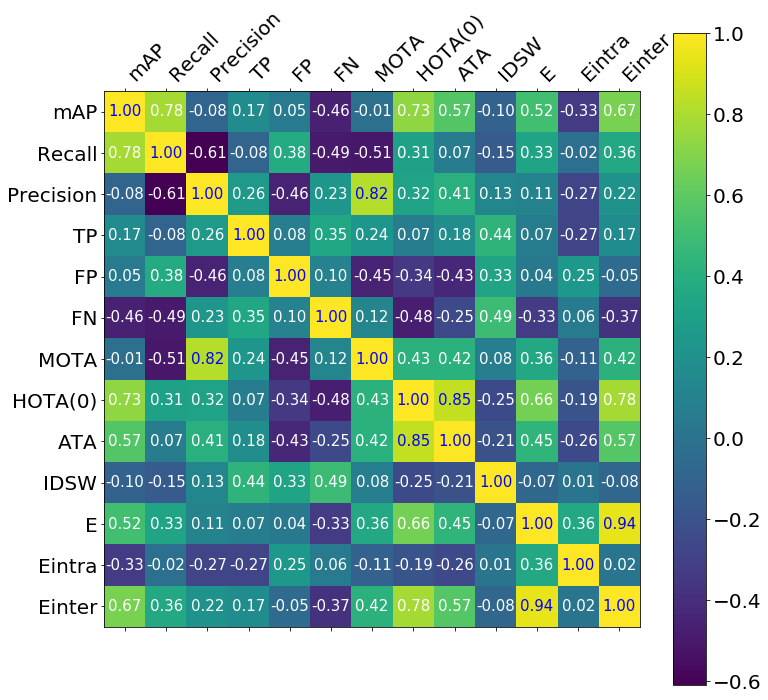

In [14]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_E.png')

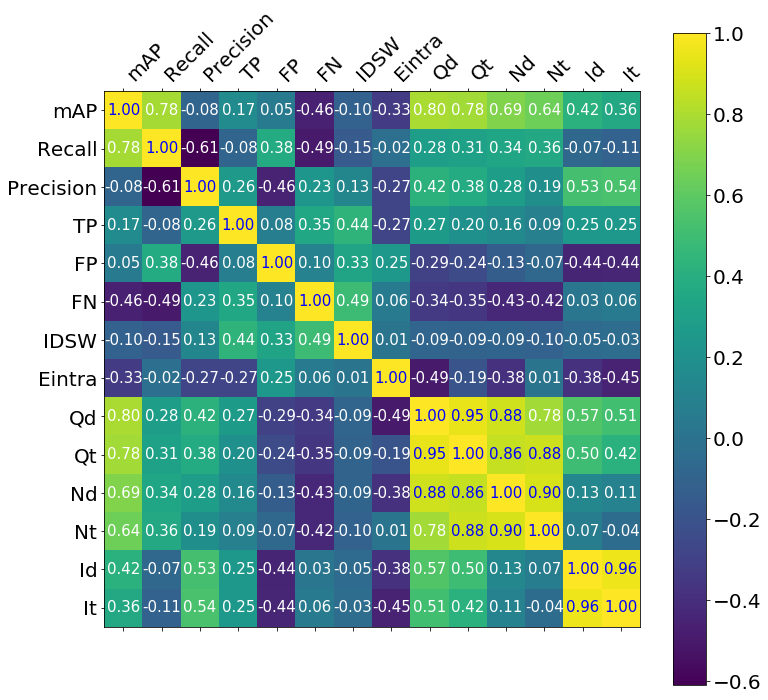

In [15]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'Eintra', 'Qd', 'Qt', 'Nd', 'Nt', 'Id', 'It']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_Eintra.png')

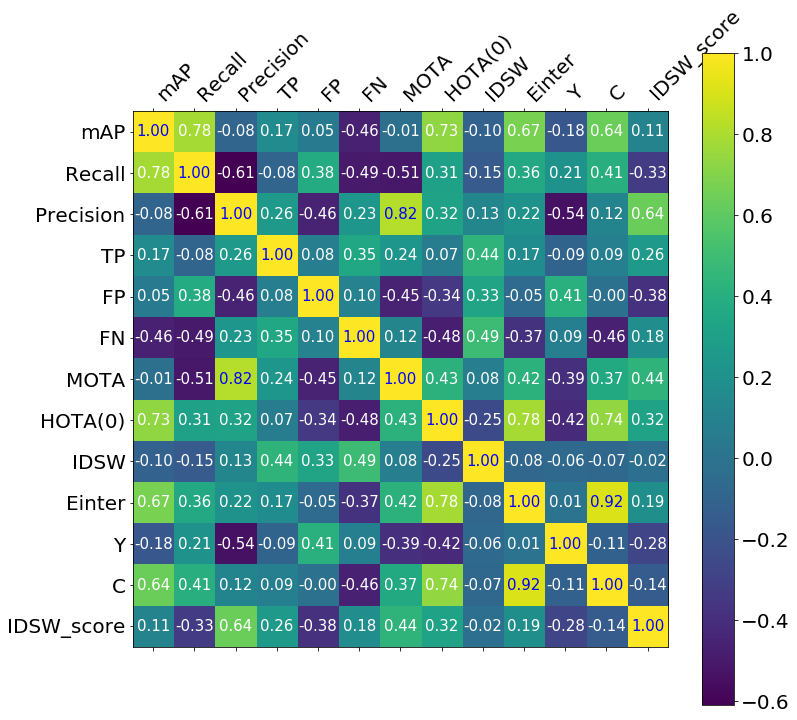

In [16]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)','IDSW', 'Einter', 'Y', 'C', 'IDSW_score']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_Einter.png')

In [17]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']

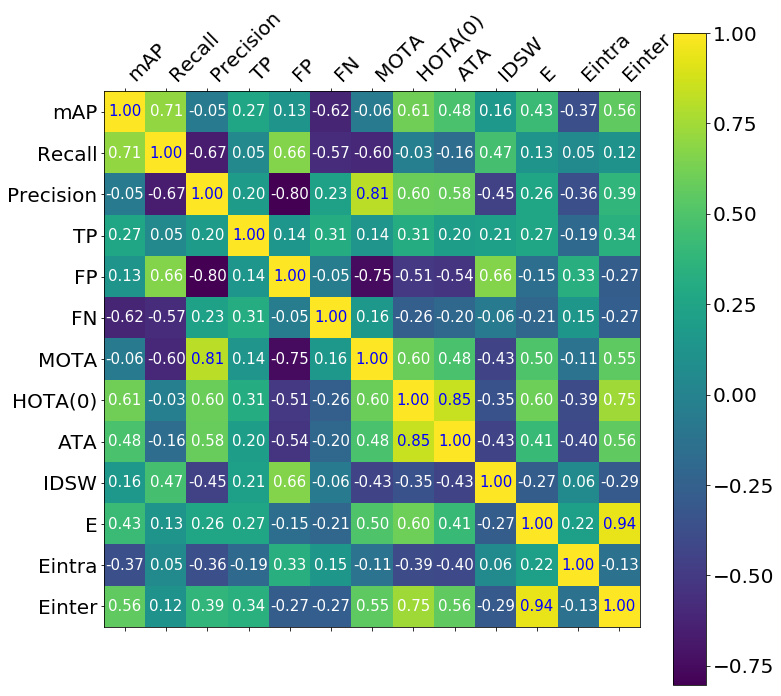

In [18]:
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT17.png')

SORT


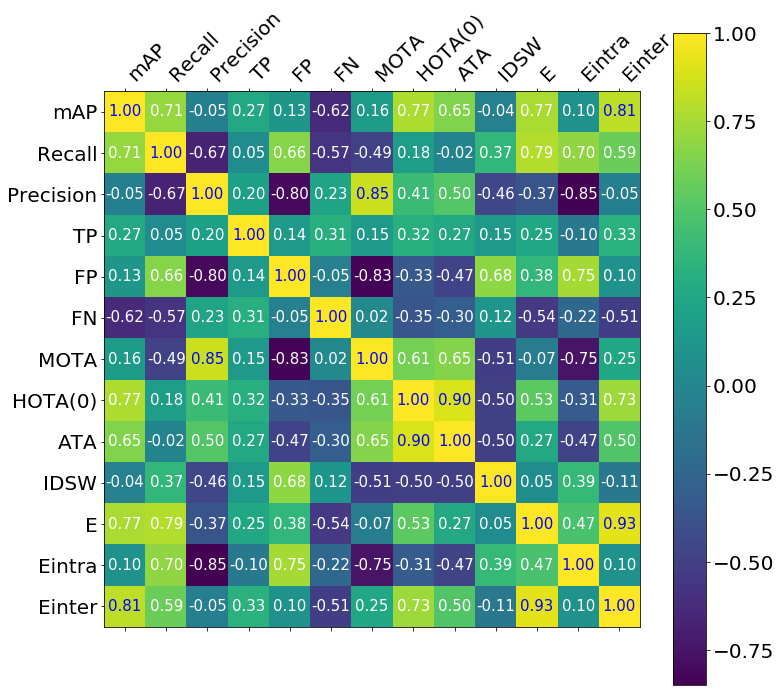

DEEP_SORT


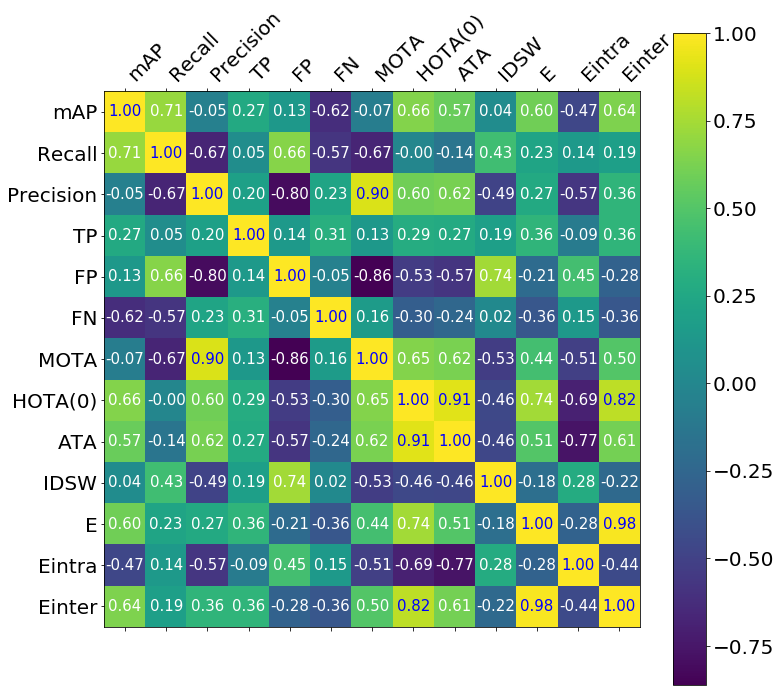

SST


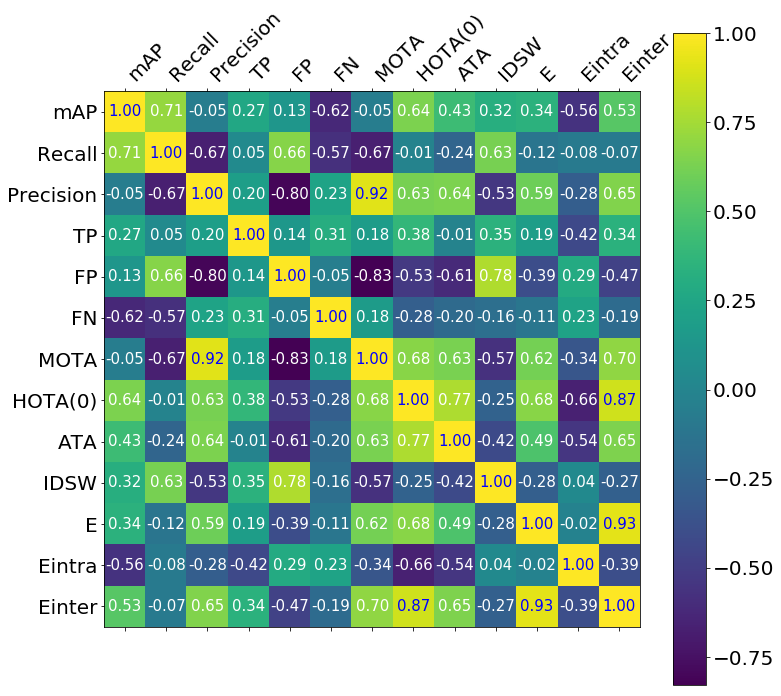

UMA


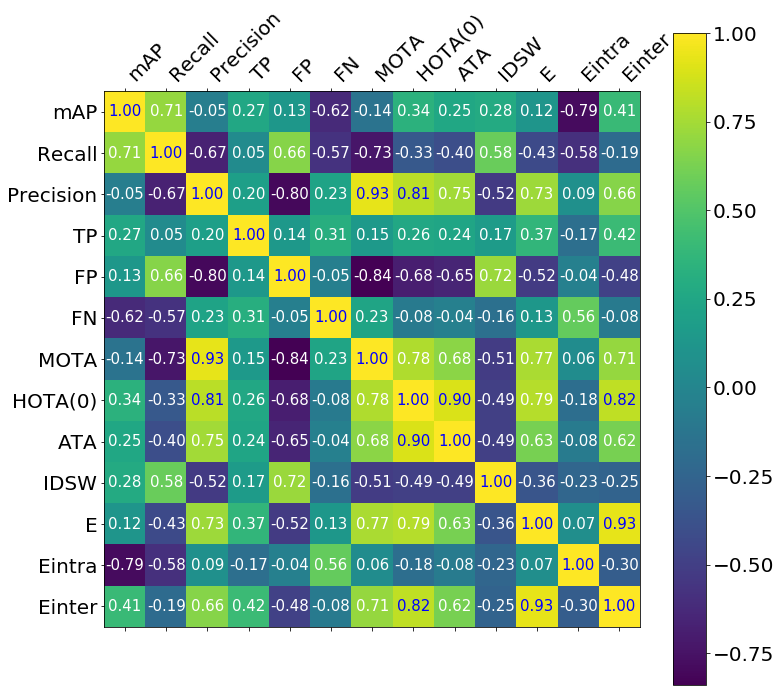

In [19]:
for trk in tb_17['Tracker'].unique():
    
    tb_search = aux.search(tb_17, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT17_' + trk + '.png')

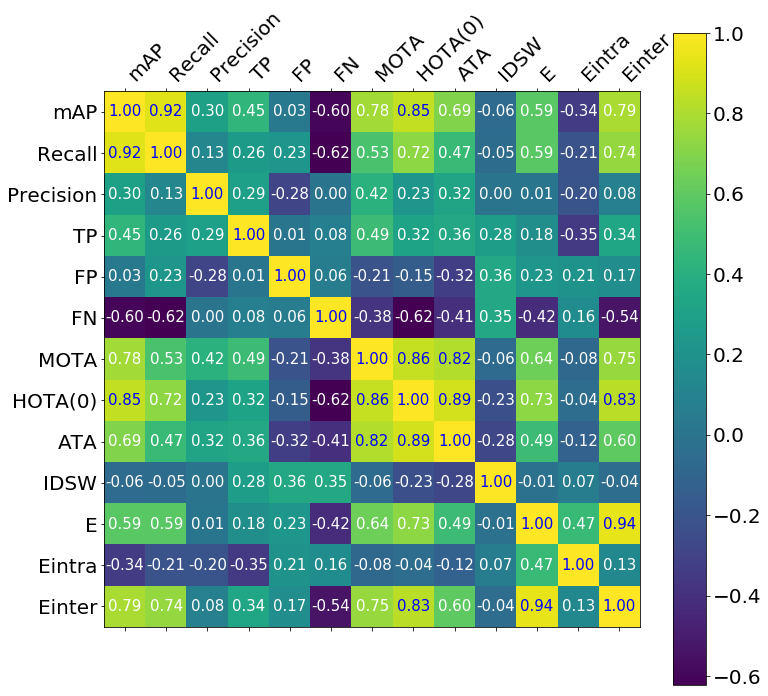

In [20]:
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT20.png')

SORT


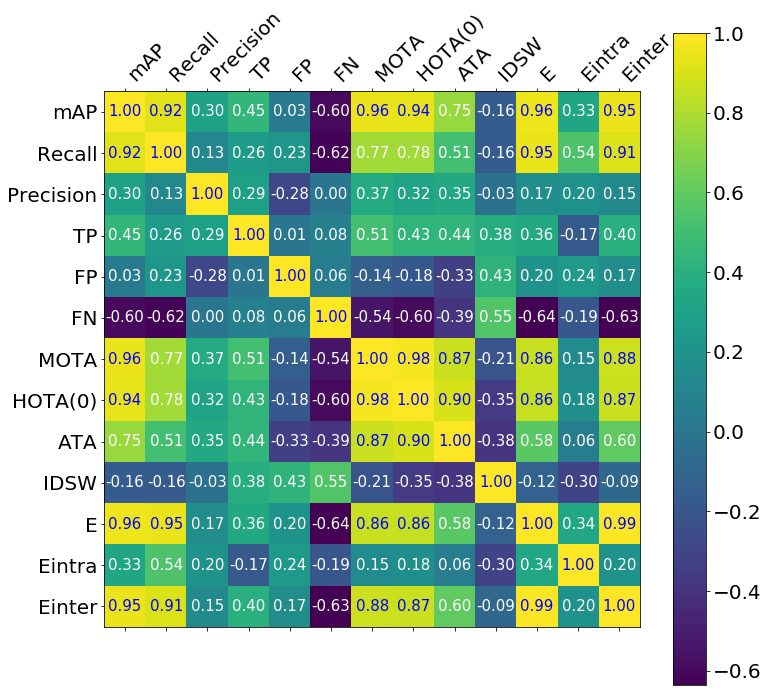

DEEP_SORT


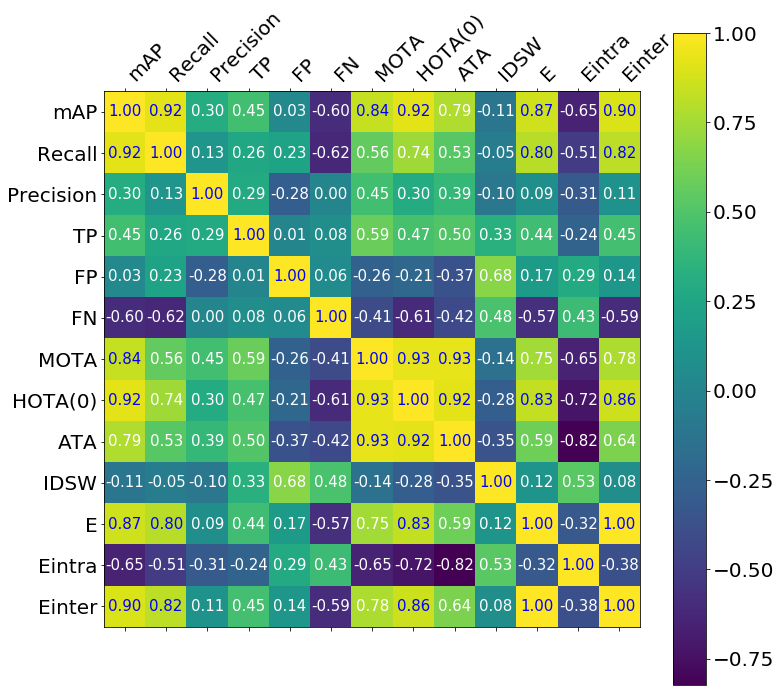

SST


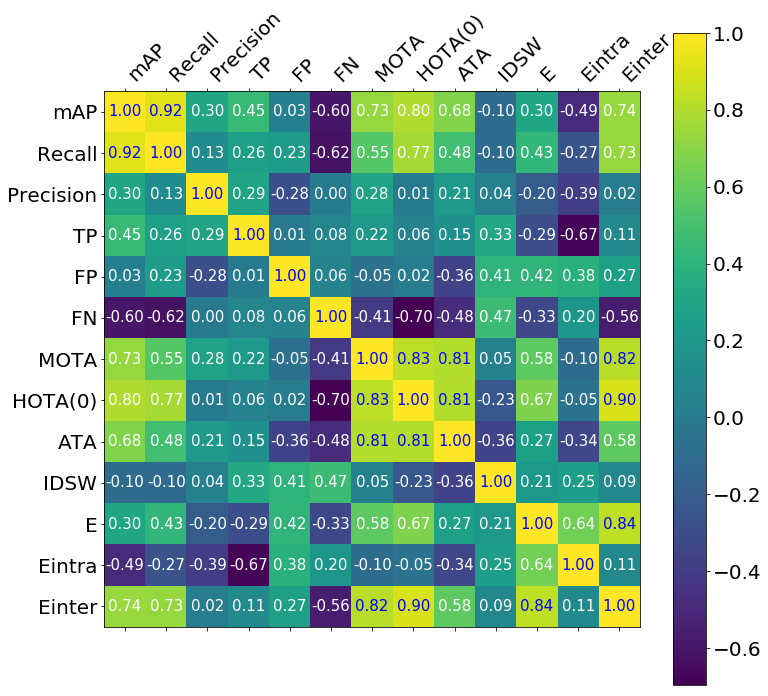

UMA


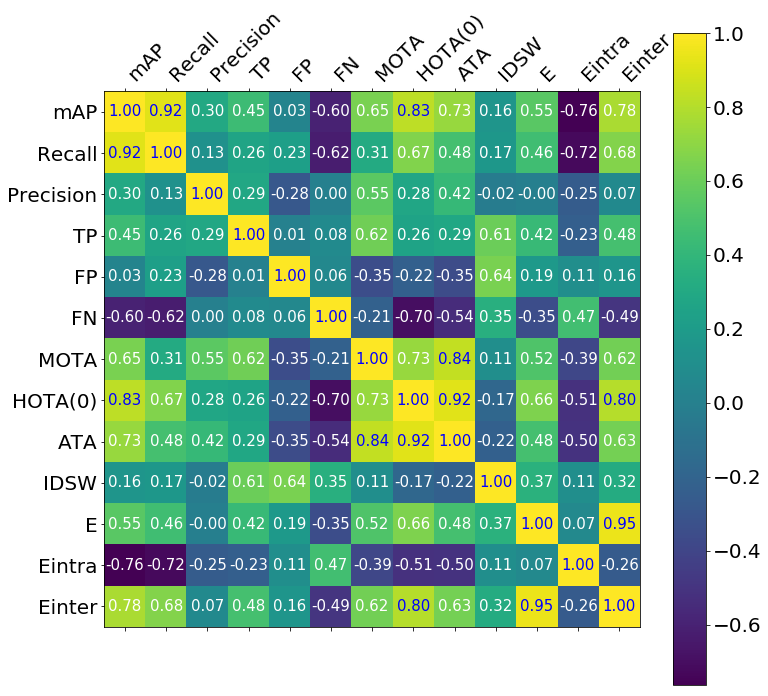

In [21]:
for trk in tb_20['Tracker'].unique():
    
    tb_search = aux.search(tb_20, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT20_' + trk + '.png')

## Matrix with more metrics

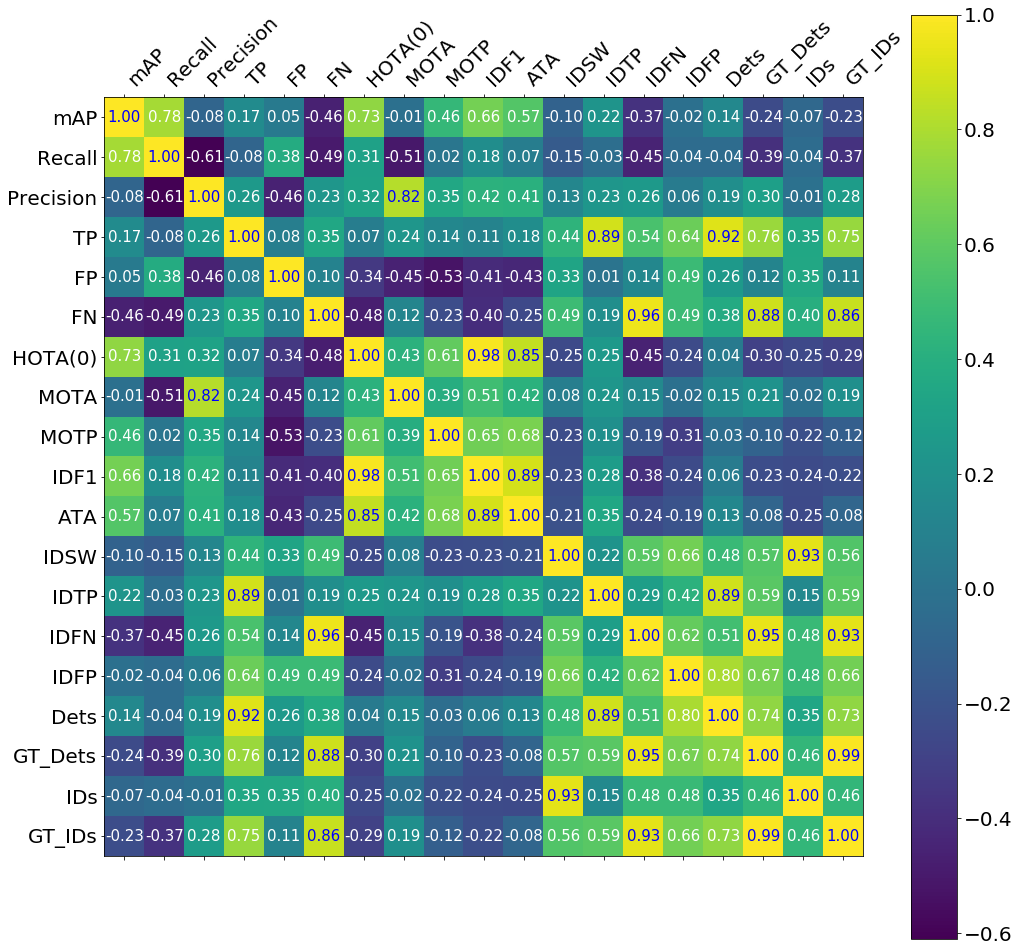

In [22]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'IDTP', 'IDFN', 'IDFP', 'Dets', 'GT_Dets', 'IDs', 'GT_IDs']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, figsize=(17, 17), file_name='correlation_matrix_more_aux.png')

# Table

In [23]:
m = tb[(tb['Set id'] == 'MOT17-02')]

m[['Detector', 'Tracker', 'mAP', 'Recall', 'Precision', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']]

Detector    Tracker         mAP     Recall   Precision  \
147                     gt       sort  100.000000  50.003709  100.000000   
168                 public       sort   28.748089  15.185460  100.000000   
105            faster_rcnn       sort   41.686243  41.316766   59.601905   
112  faster_rcnn-fine-tune       sort   59.510762  59.962908   56.538314   
119      faster_rcnn-mod-1       sort   23.691040  23.913205   63.655213   
126      faster_rcnn-mod-2       sort   34.116557  24.803412   90.708085   
133      faster_rcnn-mod-3       sort   19.327699  14.681009   80.627419   
140      faster_rcnn-mod-4       sort   10.390821   5.244807  100.000000   
343                     gt  deep_sort  100.000000  50.003709  100.000000   
364                 public  deep_sort   28.748089  15.185460  100.000000   
301            faster_rcnn  deep_sort   41.686243  41.316766   59.601905   
308  faster_rcnn-fine-tune  deep_sort   59.510762  59.962908   56.538314   
315      faster_rcnn-mod-1  deep_sort   23.691040  23.913205   63.655213   
322      faster_rcnn-mod-2  deep_sort   34.116557  24.803412   90.708085   
329      faster_rcnn-mod-3  deep_sort   19.327699  14.681009   80.627419   
336      faster_rcnn-mod-4  deep_sort   10.390821   5.244807  100.000000   
245                     gt        sst  100.000000  50.003709  100.000000   
266                 public        sst   28.748089  15.185460  100.000000   
203            faster_rcnn        sst   41.686243  41.316766   59.601905   
210  faster_rcnn-fine-tune        sst   59.510762  59.962908   56.538314   
217      faster_rcnn-mod-1        sst   23.691040  23.913205   63.655213   
224      faster_rcnn-mod-2        sst   34.116557  24.803412   90.708085   
231      faster_rcnn-mod-3        sst   19.327699  14.681009   80.627419   
238      faster_rcnn-mod-4        sst   10.390821   5.244807  100.000000   
49                      gt        uma  100.000000  50.003709  100.000000   
70                  public        uma   28.748089  15.185460  100.000000   
7              faster_rcnn        uma   41.686243  41.316766   59.601905   
14   faster_rcnn-fine-tune        uma   59.510762  59.962908   56.538314   
21       faster_rcnn-mod-1        uma   23.691040  23.913205   63.655213   
28       faster_rcnn-mod-2        uma   34.116557  24.803412   90.708085   
35       faster_rcnn-mod-3        uma   19.327699  14.681009   80.627419   
42       faster_rcnn-mod-4        uma   10.390821   5.244807  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  
147  0.909962  0.954888  0.924040     0  0.97   -0.02    0.99  
168  0.320435  0.343676  0.144317    86  0.45   -0.01    0.46  
105 -0.226952  0.310986  0.018570   482  0.78    0.05    0.73  
112 -0.540983  0.296513  0.013484  1039  0.81    0.10    0.71  
119 -0.179000  0.199457  0.018413   184  0.54   -0.05    0.59  
126  0.231150  0.356260  0.064070   187  0.59   -0.03    0.63  
133  0.162801  0.142026  0.015174   437  0.31   -0.05    0.36  
140  0.123406  0.207228  0.089216    49  0.17   -0.01    0.18  
343  0.906194  0.926147  0.828662    12  0.96   -0.03    0.99  
364  0.328508  0.387584  0.209152    62  0.47   -0.01    0.47  
301 -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65  
308 -1.545665  0.259144  0.045136  1408  0.54   -0.01    0.55  
315 -0.377375  0.252752  0.035206   170  0.65   -0.00    0.65  
322  0.176578  0.395774  0.122142   190  0.67   -0.00    0.67  
329  0.105592  0.288022  0.101663   272  0.46    0.00    0.46  
336  0.144341  0.272083  0.183191    12  0.20   -0.00    0.20  
245  0.983747  0.764423  0.387991   298  0.48   -0.31    0.79  
266  0.324848  0.384787  0.139245   112  0.45    0.00    0.44  
203 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46  
210 -0.930036  0.285409  0.006422  2147  0.49    0.05    0.44  
217 -0.433507  0.230145  0.025359   334  0.46   -0.00    0.46  
224  0.167268  0.386653  0.060871   325  0.57   -0.00    0.57  
231  0.108014  0.319179  0.059084   2

## Search special cases

In [24]:
accept = anly.search_correlation(tb, {'HOTA(0)':0.05, 'MOTA':0.05}, ['and'])

for corr in accept:

    a = pd.DataFrame([corr[0], corr[1]])
    
    display(a[['Set id', 'Detector', 'Tracker', 'mAP', 'Recall', 'Precision', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter', 'IDSW_score']])

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
147  MOT17-02       gt       sort  100.0  50.003709      100.0  0.909962   
343  MOT17-02       gt  deep_sort  100.0  50.003709      100.0  0.906194   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
147  0.954888  0.924040     0  0.97   -0.02    0.99         1.0  
343  0.926147  0.828662    12  0.96   -0.03    0.99         1.0

Set id Detector    Tracker        mAP    Recall  Precision      MOTA  \
168  MOT17-02   public       sort  28.748089  15.18546      100.0  0.320435   
364  MOT17-02   public  deep_sort  28.748089  15.18546      100.0  0.328508   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
168  0.343676  0.144317    86  0.45   -0.01    0.46        0.98  
364  0.387584  0.209152    62  0.47   -0.01    0.47        0.98

Set id Detector Tracker        mAP    Recall  Precision      MOTA  \
168  MOT17-02   public    sort  28.748089  15.18546      100.0  0.320435   
266  MOT17-02   public     sst  28.748089  15.18546      100.0  0.324848   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
168  0.343676  0.144317    86  0.45   -0.01    0.46        0.98  
266  0.384787  0.139245   112  0.45    0.00    0.44        0.97

Set id Detector    Tracker        mAP    Recall  Precision      MOTA  \
364  MOT17-02   public  deep_sort  28.748089  15.18546      100.0  0.328508   
266  MOT17-02   public        sst  28.748089  15.18546      100.0  0.324848   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
364  0.387584  0.209152    62  0.47   -0.01    0.47        0.98  
266  0.384787  0.139245   112  0.45    0.00    0.44        0.97

Set id     Detector    Tracker        mAP     Recall  Precision  \
301  MOT17-02  faster_rcnn  deep_sort  41.686243  41.316766  59.601905   
203  MOT17-02  faster_rcnn        sst  41.686243  41.316766  59.601905   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
301 -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65        0.66  
203 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46        0.54

Set id           Detector    Tracker        mAP     Recall  Precision  \
301  MOT17-02        faster_rcnn  deep_sort  41.686243  41.316766  59.601905   
21   MOT17-02  faster_rcnn-mod-1        uma  23.691040  23.913205  63.655213   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
301 -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65        0.66  
21  -0.707712  0.287322  0.107424   155  0.70    0.02    0.68        0.61

Set id           Detector    Tracker        mAP     Recall  Precision  \
322  MOT17-02  faster_rcnn-mod-2  deep_sort  34.116557  24.803412  90.708085   
224  MOT17-02  faster_rcnn-mod-2        sst  34.116557  24.803412  90.708085   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.176578  0.395774  0.122142   190  0.67    -0.0    0.67        0.89  
224  0.167268  0.386653  0.060871   325  0.57    -0.0    0.57        0.83

Set id           Detector    Tracker        mAP     Recall   Precision  \
329  MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  14.681009   80.627419   
336  MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821   5.244807  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
329  0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
336  0.144341  0.272083  0.183191    12  0.20    -0.0    0.20        1.00

Set id           Detector    Tracker        mAP     Recall  Precision  \
329  MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  14.681009  80.627419   
231  MOT17-02  faster_rcnn-mod-3        sst  19.327699  14.681009  80.627419   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
329  0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
231  0.108014  0.319179  0.059084   293  0.30    -0.0    0.30        0.63

Set id           Detector    Tracker        mAP     Recall   Precision  \
329  MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  14.681009   80.627419   
238  MOT17-02  faster_rcnn-mod-4        sst  10.390821   5.244807  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
329  0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
238  0.140251  0.266045  0.144347    25  0.18    -0.0    0.18        0.99

Set id           Detector    Tracker        mAP     Recall   Precision  \
336  MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821   5.244807  100.000000   
231  MOT17-02  faster_rcnn-mod-3        sst  19.327699  14.681009   80.627419   

         MOTA   HOTA(0)       ATA  IDSW    E  Eintra  Einter  IDSW_score  
336  0.144341  0.272083  0.183191    12  0.2    -0.0     0.2        1.00  
231  0.108014  0.319179  0.059084   293  0.3    -0.0     0.3        0.63

Set id           Detector    Tracker        mAP    Recall  Precision  \
336  MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821  5.244807      100.0   
238  MOT17-02  faster_rcnn-mod-4        sst  10.390821  5.244807      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
336  0.144341  0.272083  0.183191    12  0.20    -0.0    0.20        1.00  
238  0.140251  0.266045  0.144347    25  0.18    -0.0    0.18        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
203  MOT17-02        faster_rcnn     sst  41.686243  41.316766  59.601905   
21   MOT17-02  faster_rcnn-mod-1     uma  23.691040  23.913205  63.655213   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
203 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46        0.54  
21  -0.707712  0.287322  0.107424   155  0.70    0.02    0.68        0.61

Set id           Detector Tracker        mAP     Recall   Precision  \
224  MOT17-02  faster_rcnn-mod-2     sst  34.116557  24.803412   90.708085   
42   MOT17-02  faster_rcnn-mod-4     uma  10.390821   5.244807  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
224  0.167268  0.386653  0.060871   325  0.57   -0.00    0.57        0.83  
42   0.168936  0.342128  0.253245     2  0.25    0.01    0.23        1.00

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
148  MOT17-04       gt       sort  100.0  50.000758      100.0  0.710411   
344  MOT17-04       gt  deep_sort  100.0  50.000758      100.0  0.709401   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
148  0.878817  0.911521     0  0.98   -0.01     1.0         1.0  
344  0.877694  0.910226     0  0.97   -0.02     1.0         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
169  MOT17-04   public       sort  42.893776  21.519582      100.0  0.539984   
365  MOT17-04   public  deep_sort  42.893776  21.519582      100.0  0.545808   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
169  0.544565  0.281323    86  0.59   -0.01     0.6         1.0  
365  0.580281  0.367510    49  0.60   -0.00     0.6         1.0

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
169  MOT17-04   public    sort  42.893776  21.519582      100.0  0.539984   
267  MOT17-04   public     sst  42.893776  21.519582      100.0  0.547869   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
169  0.544565  0.281323    86  0.59   -0.01    0.60         1.0  
267  0.563715  0.308978    79  0.60    0.01    0.59         1.0

Set id               Detector Tracker        mAP     Recall  Precision  \
106  MOT17-04            faster_rcnn    sort  54.103815  45.301114  83.604082   
15   MOT17-04  faster_rcnn-fine-tune     uma  71.994412  46.805545  99.967642   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
106  0.076792  0.519879  0.043214   351  0.88    0.01    0.87        0.84  
15   0.031962  0.536223  0.243032   449  0.82   -0.06    0.88        0.87

Set id           Detector Tracker       mAP    Recall  Precision  \
141  MOT17-04  faster_rcnn-mod-4    sort  15.17361  7.914552  96.259444   
239  MOT17-04  faster_rcnn-mod-4     sst  15.17361  7.914552  96.259444   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
141  0.140190  0.227020  0.058077   149  0.25   -0.01    0.27        0.98  
239  0.157579  0.264722  0.099846    82  0.27   -0.00    0.27        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
365  MOT17-04   public  deep_sort  42.893776  21.519582      100.0  0.545808   
267  MOT17-04   public        sst  42.893776  21.519582      100.0  0.547869   

      HOTA(0)       ATA  IDSW    E  Eintra  Einter  IDSW_score  
365  0.580281  0.367510    49  0.6   -0.00    0.60         1.0  
267  0.563715  0.308978    79  0.6    0.01    0.59         1.0

Set id     Detector    Tracker        mAP     Recall  Precision  \
302  MOT17-04  faster_rcnn  deep_sort  54.103815  45.301114  83.604082   
204  MOT17-04  faster_rcnn        sst  54.103815  45.301114  83.604082   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
302 -0.195113  0.497010  0.105905   385  0.80   -0.01    0.82        0.79  
204 -0.145699  0.524348  0.033439   945  0.68    0.00    0.68        0.70

Set id           Detector    Tracker        mAP     Recall  Precision  \
302  MOT17-04        faster_rcnn  deep_sort  54.103815  45.301114  83.604082   
22   MOT17-04  faster_rcnn-mod-1        uma  39.248966  31.818802  90.479063   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
302 -0.195113  0.497010  0.105905   385  0.80   -0.01    0.82        0.79  
22  -0.171100  0.517919  0.222654   125  0.91    0.05    0.86        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
316  MOT17-04  faster_rcnn-mod-1  deep_sort  39.248966  31.818802  90.479063   
218  MOT17-04  faster_rcnn-mod-1        sst  39.248966  31.818802  90.479063   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
316 -0.072734  0.419256  0.094817   168  0.79    0.01    0.79        0.86  
218 -0.050066  0.404505  0.060816   331  0.69   -0.00    0.69        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
316  MOT17-04  faster_rcnn-mod-1  deep_sort  39.248966  31.818802  90.479063   
36   MOT17-04  faster_rcnn-mod-3        uma  30.042432  21.598364  85.941645   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
316 -0.072734  0.419256  0.094817   168  0.79    0.01    0.79        0.86  
36  -0.104716  0.369293  0.176362   334  0.74    0.06    0.69        0.71

Set id               Detector    Tracker        mAP     Recall  \
323  MOT17-04      faster_rcnn-mod-2  deep_sort  46.556512  30.559806   
211  MOT17-04  faster_rcnn-fine-tune        sst  71.994412  46.805545   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
323  94.530884  0.278361  0.585937  0.201438   139  0.79     0.0    0.79   
211  99.967642  0.250983  0.593237  0.077174  1158  0.76    -0.0    0.76   

     IDSW_score  
323        0.95  
211        0.79

Set id           Detector    Tracker        mAP     Recall  Precision  \
323  MOT17-04  faster_rcnn-mod-2  deep_sort  46.556512  30.559806  94.530884   
225  MOT17-04  faster_rcnn-mod-2        sst  46.556512  30.559806  94.530884   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
323  0.278361  0.585937  0.201438   139  0.79     0.0    0.79        0.95  
225  0.287718  0.574938  0.107593   332  0.71    -0.0    0.71        0.92

Set id           Detector    Tracker        mAP     Recall  Precision  \
330  MOT17-04  faster_rcnn-mod-3  deep_sort  30.042432  21.598364  85.941645   
337  MOT17-04  faster_rcnn-mod-4  deep_sort  15.173610   7.914552  96.259444   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
330  0.116450  0.335240  0.107195   517  0.61    0.01     0.6         0.8  
337  0.160166  0.292481  0.158236    30  0.30    0.00     0.3         1.0

Set id           Detector    Tracker       mAP    Recall  Precision  \
337  MOT17-04  faster_rcnn-mod-4  deep_sort  15.17361  7.914552  96.259444   
239  MOT17-04  faster_rcnn-mod-4        sst  15.17361  7.914552  96.259444   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
337  0.160166  0.292481  0.158236    30  0.30     0.0    0.30        1.00  
239  0.157579  0.264722  0.099846    82  0.27    -0.0    0.27        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
204  MOT17-04        faster_rcnn     sst  54.103815  45.301114  83.604082   
22   MOT17-04  faster_rcnn-mod-1     uma  39.248966  31.818802  90.479063   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
204 -0.145699  0.524348  0.033439   945  0.68    0.00    0.68        0.70  
22  -0.171100  0.517919  0.222654   125  0.91    0.05    0.86        0.85

Set id               Detector Tracker        mAP     Recall  Precision  \
211  MOT17-04  faster_rcnn-fine-tune     sst  71.994412  46.805545  99.967642   
225  MOT17-04      faster_rcnn-mod-2     sst  46.556512  30.559806  94.530884   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
211  0.250983  0.593237  0.077174  1158  0.76    -0.0    0.76        0.79  
225  0.287718  0.574938  0.107593   332  0.71    -0.0    0.71        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
211  MOT17-04  faster_rcnn-fine-tune     sst  71.994412  46.805545  99.967642   
29   MOT17-04      faster_rcnn-mod-2     uma  46.556512  30.559806  94.530884   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
211  0.250983  0.593237  0.077174  1158  0.76   -0.00    0.76        0.79  
29   0.206889  0.578332  0.274107   133  0.87    0.03    0.83        0.92

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
149  MOT17-05       gt       sort  100.0  50.012897      100.0  0.865404   
345  MOT17-05       gt  deep_sort  100.0  50.012897      100.0  0.864392   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
149  0.890944  0.712960    20  0.83   -0.13    0.96        1.00  
345  0.844225  0.612803    36  0.84   -0.13    0.97        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
128  MOT17-05  faster_rcnn-mod-2       sort  60.860086  48.529791  92.434291   
338  MOT17-05  faster_rcnn-mod-4  deep_sort  43.161828  23.007480  97.167756   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
128  0.398728  0.583206  0.202417   126  0.84   -0.01    0.85        0.92  
338  0.435593  0.572278  0.329738    20  0.62   -0.02    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
128  MOT17-05  faster_rcnn-mod-2    sort  60.860086  48.529791  92.434291   
240  MOT17-05  faster_rcnn-mod-4     sst  43.161828  23.007480  97.167756   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
128  0.398728  0.583206  0.202417   126  0.84   -0.01    0.85        0.92  
240  0.441810  0.568384  0.278139   105  0.59   -0.00    0.59        0.96

Set id Detector    Tracker        mAP  Recall  Precision      MOTA  \
366  MOT17-05   public  deep_sort  47.641404  24.813  99.948052  0.491976   
268  MOT17-05   public        sst  47.641404  24.813  99.948052  0.497904   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
366  0.597254  0.392926    28  0.62   -0.02    0.64        0.99  
268  0.583515  0.334480   109  0.62    0.00    0.61        0.97

Set id           Detector    Tracker        mAP    Recall  Precision  \
338  MOT17-05  faster_rcnn-mod-4  deep_sort  43.161828  23.00748  97.167756   
240  MOT17-05  faster_rcnn-mod-4        sst  43.161828  23.00748  97.167756   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
338  0.435593  0.572278  0.329738    20  0.62   -0.02    0.64        0.98  
240  0.441810  0.568384  0.278139   105  0.59   -0.00    0.59        0.96

Set id           Detector Tracker        mAP    Recall  Precision  \
72  MOT17-05             public     uma  47.641404  24.81300  99.948052   
44  MOT17-05  faster_rcnn-mod-4     uma  43.161828  23.00748  97.167756   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
72  0.518867  0.659632  0.472925    41  0.69    0.02    0.67        0.97  
44  0.469279  0.652966  0.428103    33  0.71    0.03    0.68        0.98

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
171  MOT17-09   public       sort  51.792453  26.117486      100.0  0.530329   
367  MOT17-09   public  deep_sort  51.792453  26.117486      100.0  0.556056   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
171  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
367  0.520900  0.372510    14  0.67   -0.02    0.68        1.00

Set id           Detector    Tracker        mAP     Recall   Precision  \
171  MOT17-09             public       sort  51.792453  26.117486  100.000000   
339  MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  25.124165   97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
171  0.530329  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
339  0.527700  0.522987  0.367636    14  0.67   -0.00    0.67        0.99

Set id           Detector Tracker        mAP     Recall   Precision  \
171  MOT17-09             public    sort  51.792453  26.117486  100.000000   
241  MOT17-09  faster_rcnn-mod-4     sst  49.426002  25.124165   97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
171  0.530329  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
241  0.527324  0.511866  0.218502    59  0.64   -0.00    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
108  MOT17-09        faster_rcnn    sort  67.048168  67.768454  58.285462   
234  MOT17-09  faster_rcnn-mod-3     sst  57.719206  55.386196  81.378963   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
108  0.056150  0.473520  0.038059    96  0.97    0.13    0.84        0.86  
234  0.062911  0.490842  0.079794   256  0.47    0.00    0.47        0.54

Set id           Detector Tracker        mAP     Recall   Precision  \
129  MOT17-09  faster_rcnn-mod-2    sort  64.642429  50.727864   97.530458   
269  MOT17-09             public     sst  51.792453  26.117486  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
129  0.599624  0.591042  0.173272    54  0.90    0.01    0.89        0.93  
269  0.556432  0.545199  0.309508    38  0.67    0.00    0.67        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
129  MOT17-09  faster_rcnn-mod-2    sort  64.642429  50.727864  97.530458   
45   MOT17-09  faster_rcnn-mod-4     uma  49.426002  25.124165  97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
129  0.599624  0.591042  0.173272    54  0.90    0.01    0.89        0.93  
45   0.602254  0.637004  0.503068    17  0.78    0.05    0.74        0.99

Set id           Detector    Tracker        mAP     Recall   Precision  \
367  MOT17-09             public  deep_sort  51.792453  26.117486  100.000000   
339  MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  25.124165   97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
367  0.556056  0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
339  0.527700  0.522987  0.367636    14  0.67   -0.00    0.67        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
367  MOT17-09   public  deep_sort  51.792453  26.117486      100.0  0.556056   
269  MOT17-09   public        sst  51.792453  26.117486      100.0  0.556432   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
367  0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
269  0.545199  0.309508    38  0.67    0.00    0.67        0.99

Set id           Detector    Tracker        mAP     Recall   Precision  \
367  MOT17-09             public  deep_sort  51.792453  26.117486  100.000000   
241  MOT17-09  faster_rcnn-mod-4        sst  49.426002  25.124165   97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
367  0.556056  0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
241  0.527324  0.511866  0.218502    59  0.64   -0.00    0.64        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
304  MOT17-09        faster_rcnn  deep_sort  67.048168  67.768454  58.285462   
318  MOT17-09  faster_rcnn-mod-1  deep_sort  44.240166  45.418736  55.066445   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
304 -0.604131  0.416854  0.048045   120  0.66    0.01    0.65        0.85  
318 -0.564319  0.374385  0.066305    51  0.67    0.01    0.66        0.73

Set id           Detector    Tracker        mAP     Recall  Precision  \
304  MOT17-09        faster_rcnn  deep_sort  67.048168  67.768454  58.285462   
38   MOT17-09  faster_rcnn-mod-3        uma  57.719206  55.386196  81.378963   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
304 -0.604131  0.416854  0.048045   120  0.66    0.01    0.65        0.85  
38  -0.554742  0.392423  0.199243   199  0.43   -0.12    0.55        0.71

Set id           Detector    Tracker        mAP     Recall  Precision  \
318  MOT17-09  faster_rcnn-mod-1  deep_sort  44.240166  45.418736  55.066445   
38   MOT17-09  faster_rcnn-mod-3        uma  57.719206  55.386196  81.378963   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
318 -0.564319  0.374385  0.066305    51  0.67    0.01    0.66        0.73  
38  -0.554742  0.392423  0.199243   199  0.43   -0.12    0.55        0.71

Set id           Detector    Tracker        mAP     Recall   Precision  \
325  MOT17-09  faster_rcnn-mod-2  deep_sort  64.642429  50.727864   97.530458   
269  MOT17-09             public        sst  51.792453  26.117486  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
325  0.525634  0.586620  0.189608    55  0.87    -0.0    0.87        0.90  
269  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
325  MOT17-09  faster_rcnn-mod-2  deep_sort  64.642429  50.727864  97.530458   
227  MOT17-09  faster_rcnn-mod-2        sst  64.642429  50.727864  97.530458   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
325  0.525634  0.586620  0.189608    55  0.87    -0.0    0.87        0.90  
227  0.479624  0.611473  0.104272   135  0.77    -0.0    0.77        0.83

Set id           Detector    Tracker        mAP     Recall   Precision  \
339  MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  25.124165   97.865243   
269  MOT17-09             public        sst  51.792453  26.117486  100.000000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.527700  0.522987  0.367636    14  0.67    -0.0    0.67        0.99  
269  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
339  MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  25.124165  97.865243   
241  MOT17-09  faster_rcnn-mod-4        sst  49.426002  25.124165  97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.527700  0.522987  0.367636    14  0.67    -0.0    0.67        0.99  
241  0.527324  0.511866  0.218502    59  0.64    -0.0    0.64        0.98

Set id           Detector Tracker        mAP     Recall   Precision  \
269  MOT17-09             public     sst  51.792453  26.117486  100.000000   
241  MOT17-09  faster_rcnn-mod-4     sst  49.426002  25.124165   97.865243   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
269  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99  
241  0.527324  0.511866  0.218502    59  0.64    -0.0    0.64        0.98

Set id           Detector Tracker        mAP     Recall   Precision  \
73  MOT17-09             public     uma  51.792453  26.117486  100.000000   
45  MOT17-09  faster_rcnn-mod-4     uma  49.426002  25.124165   97.865243   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
73  0.629671  0.685312  0.628067     8  0.74    0.01    0.73        0.99  
45  0.602254  0.637004  0.503068    17  0.78    0.05    0.74        0.99

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
151  MOT17-10       gt       sort  100.0  50.007022      100.0  0.974297   
347  MOT17-10       gt  deep_sort  100.0  50.007022      100.0  0.980762   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
151  0.887750  0.660438    45  0.90   -0.08    0.99         1.0  
347  0.917225  0.804598    17  0.91   -0.08    0.99         1.0

Set id           Detector    Tracker        mAP     Recall  Precision  \
123  MOT17-10  faster_rcnn-mod-1       sort  51.725326  54.220506  66.070512   
333  MOT17-10  faster_rcnn-mod-3  deep_sort  43.512026  36.004213  79.959451   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
123  0.095335  0.370596  0.027283   209  0.98    0.12    0.87        0.76  
333  0.113794  0.404553  0.127831   396  0.67    0.01    0.67        0.64

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
368  MOT17-10   public  deep_sort  58.885698  34.009831  99.835086  0.496222   
270  MOT17-10   public        sst  58.885698  34.009831  99.835086  0.479554   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
368  0.541744  0.249741   163  0.77   -0.01    0.78        0.95  
270  0.530361  0.164437   326  0.71    0.01    0.71        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
319  MOT17-10  faster_rcnn-mod-1  deep_sort  51.725326  54.220506  66.070512   
39   MOT17-10  faster_rcnn-mod-3        uma  43.512026  36.004213  79.959451   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
319 -0.415375  0.407539  0.037912   224  0.84    0.06    0.79        0.74  
39  -0.378768  0.401722  0.162166   331  0.57   -0.07    0.63        0.66

Set id           Detector    Tracker        mAP     Recall  Precision  \
333  MOT17-10  faster_rcnn-mod-3  deep_sort  43.512026  36.004213  79.959451   
235  MOT17-10  faster_rcnn-mod-3        sst  43.512026  36.004213  79.959451   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
333  0.113794  0.404553  0.127831   396  0.67    0.01    0.67        0.64  
235  0.106940  0.438714  0.074164   491  0.43    0.00    0.43        0.50

Set id           Detector    Tracker       mAP     Recall  Precision  \
340  MOT17-10  faster_rcnn-mod-4  deep_sort  24.99377  12.879213  97.657082   
242  MOT17-10  faster_rcnn-mod-4        sst  24.99377  12.879213  97.657082   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
340  0.276657  0.360097  0.216079    17  0.44     0.0    0.44        1.00  
242  0.266220  0.341924  0.149676    53  0.38    -0.0    0.38        0.98

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
152  MOT17-11       gt       sort  100.0  50.010506      100.0  0.979017   
348  MOT17-11       gt  deep_sort  100.0  50.010506      100.0  0.978275   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
152  0.969785  0.867037     7  0.92   -0.07    0.98         1.0  
348  0.970744  0.882957     2  0.92   -0.07    0.99         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
173  MOT17-11   public       sort  60.102493  31.561252      100.0  0.554684   
369  MOT17-11   public  deep_sort  60.102493  31.561252      100.0  0.571111   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
173  0.549020  0.295536    53  0.71   -0.03    0.73        0.99  
369  0.588907  0.362398    34  0.74   -0.01    0.75        0.99

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
173  MOT17-11   public    sort  60.102493  31.561252      100.0  0.554684   
271  MOT17-11   public     sst  60.102493  31.561252      100.0  0.569097   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
173  0.549020  0.295536    53  0.71   -0.03    0.73        0.99  
271  0.570539  0.305052    67  0.74    0.00    0.73        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
110  MOT17-11        faster_rcnn    sort  67.183533  70.014709  43.940393   
40   MOT17-11  faster_rcnn-mod-3     uma  57.056801  48.266443  90.647198   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
110 -0.357143  0.480671  0.035124   158  0.97    0.16    0.82        0.88  
40  -0.374311  0.470536  0.169458   182  0.50   -0.14    0.64        0.79

Set id               Detector    Tracker        mAP     Recall  \
117  MOT17-11  faster_rcnn-fine-tune       sort  84.047280  87.844085   
306  MOT17-11            faster_rcnn  deep_sort  67.183533  70.014709   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
117  32.110761 -1.292285  0.372019  0.020035   404  0.74    0.12    0.62   
306  43.940393 -1.307546  0.397970  0.039101   142  0.64    0.03    0.61   

     IDSW_score  
117        0.89  
306        0.87

Set id               Detector Tracker        mAP     Recall  Precision  \
117  MOT17-11  faster_rcnn-fine-tune    sort  84.047280  87.844085  32.110761   
222  MOT17-11      faster_rcnn-mod-1     sst  42.072711  43.801219  41.950091   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
117 -1.292285  0.372019  0.020035   404  0.74    0.12    0.62        0.89  
222 -1.250848  0.352441  0.026324   137  0.41    0.00    0.40        0.60

Set id           Detector Tracker       mAP     Recall  Precision  \
145  MOT17-11  faster_rcnn-mod-4    sort  51.03177  26.518176  98.748044   
243  MOT17-11  faster_rcnn-mod-4     sst  51.03177  26.518176  98.748044   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
145  0.480076  0.507004  0.254496    31  0.65   -0.03    0.67        0.99  
243  0.501378  0.546671  0.258987    25  0.68   -0.00    0.68        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
369  MOT17-11   public  deep_sort  60.102493  31.561252      100.0  0.571111   
271  MOT17-11   public        sst  60.102493  31.561252      100.0  0.569097   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
369  0.588907  0.362398    34  0.74   -0.01    0.75        0.99  
271  0.570539  0.305052    67  0.74    0.00    0.73        0.98

Set id           Detector    Tracker       mAP     Recall  Precision  \
341  MOT17-11  faster_rcnn-mod-4  deep_sort  51.03177  26.518176  98.748044   
47   MOT17-11  faster_rcnn-mod-4        uma  51.03177  26.518176  98.748044   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
341  0.500106  0.609458  0.332476    11  0.69   -0.01    0.70        1.00  
47   0.502331  0.619543  0.330117    22  0.72   -0.01    0.73        0.99

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
153  MOT17-13       gt       sort  100.0  50.003001      100.0  0.538825   
349  MOT17-13       gt  deep_sort  100.0  50.003001      100.0  0.533843   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
153  0.793573  0.762137    10  0.87   -0.11    0.97         1.0  
349  0.751528  0.701078     9  0.87   -0.11    0.98         1.0

Set id Detector Tracker    mAP     Recall  Precision      MOTA  \
153  MOT17-13       gt    sort  100.0  50.003001      100.0  0.538825   
55   MOT17-13       gt     uma  100.0  50.003001      100.0  0.518468   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
153  0.793573  0.762137    10  0.87   -0.11    0.97        1.00  
55   0.749240  0.674815    61  0.80   -0.17    0.96        0.99

Set id Detector Tracker        mAP    Recall  Precision      MOTA  \
174  MOT17-13   public    sort  40.895173  25.31957  99.928944  0.458340   
272  MOT17-13   public     sst  40.895173  25.31957  99.928944  0.409036   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
174  0.513108  0.205431   181  0.51   -0.05    0.56        0.96  
272  0.559805  0.237407   559  0.51    0.00    0.50        0.83

Set id           Detector    Tracker        mAP     Recall  Precision  \
139  MOT17-13  faster_rcnn-mod-3       sort  40.771876  32.977255   81.34715   
342  MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796   9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
139 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
342 -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
139  MOT17-13  faster_rcnn-mod-3    sort  40.771876  32.977255   81.34715   
244  MOT17-13  faster_rcnn-mod-4     sst  18.388796   9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
139 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
244 -0.064594  0.202299  0.099185    68  0.33   -0.00    0.33        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
139  MOT17-13  faster_rcnn-mod-3    sort  40.771876  32.977255   81.34715   
48   MOT17-13  faster_rcnn-mod-4     uma  18.388796   9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
139 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
48  -0.060213  0.262213  0.166814     1  0.46    0.03    0.43        0.99

Set id           Detector    Tracker        mAP    Recall  Precision  \
146  MOT17-13  faster_rcnn-mod-4       sort  18.388796  9.386065   98.36478   
342  MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
146 -0.061244  0.168097  0.081149    25  0.29   -0.04    0.32        0.98  
342 -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99

Set id           Detector Tracker        mAP    Recall  Precision  \
146  MOT17-13  faster_rcnn-mod-4    sort  18.388796  9.386065   98.36478   
244  MOT17-13  faster_rcnn-mod-4     sst  18.388796  9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
146 -0.061244  0.168097  0.081149    25  0.29   -0.04    0.32        0.98  
244 -0.064594  0.202299  0.099185    68  0.33   -0.00    0.33        0.96

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
349  MOT17-13       gt  deep_sort  100.0  50.003001      100.0  0.533843   
55   MOT17-13       gt        uma  100.0  50.003001      100.0  0.518468   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
349  0.751528  0.701078     9  0.87   -0.11    0.98        1.00  
55   0.749240  0.674815    61  0.80   -0.17    0.96        0.99

Set id Detector    Tracker        mAP    Recall  Precision      MOTA  \
370  MOT17-13   public  deep_sort  40.895173  25.31957  99.928944  0.454561   
272  MOT17-13   public        sst  40.895173  25.31957  99.928944  0.409036   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
370  0.569496  0.316998   128  0.59   -0.02    0.61        0.94  
272  0.559805  0.237407   559  0.51    0.00    0.50        0.83

Set id               Detector    Tracker        mAP     Recall  \
321  MOT17-13      faster_rcnn-mod-1  deep_sort  51.506577  55.728260   
216  MOT17-13  faster_rcnn-fine-tune        sst  76.004695  77.279001   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
321  52.042818 -2.045181  0.306720  0.051485   210  0.62    0.03    0.59   
216  63.449125 -2.014946  0.332113  0.027378  1724  0.41    0.01    0.41   

     IDSW_score  
321        0.72  
216        0.69

Set id           Detector    Tracker        mAP    Recall  Precision  \
342  MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  9.386065   98.36478   
244  MOT17-13  faster_rcnn-mod-4        sst  18.388796  9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342 -0.068459  0.218088  0.125938     6  0.37    -0.0    0.38        0.99  
244 -0.064594  0.202299  0.099185    68  0.33    -0.0    0.33        0.96

Set id           Detector    Tracker        mAP    Recall  Precision  \
342  MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  9.386065   98.36478   
48   MOT17-13  faster_rcnn-mod-4        uma  18.388796  9.386065   98.36478   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342 -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99  
48  -0.060213  0.262213  0.166814     1  0.46    0.03    0.43        0.99

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
456  MOT20-01       gt       sort  100.0  50.004456      100.0  0.994263   
536  MOT20-01       gt  deep_sort  100.0  50.004456      100.0  0.991444   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
456  0.994329  0.985178     0  0.97   -0.02    0.99         1.0  
536  0.964930  0.914178     3  0.95   -0.04    0.99         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
460  MOT20-01   public       sort  55.815239  28.038674  99.793847  0.527730   
540  MOT20-01   public  deep_sort  55.815239  28.038674  99.793847  0.565979   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
460  0.493122  0.216287   165  0.67   -0.03    0.69        0.98  
540  0.531738  0.330623   117  0.71   -0.01    0.72        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
432  MOT20-01        faster_rcnn    sort  57.594396  47.406879  88.357416   
404  MOT20-01  faster_rcnn-mod-2     uma  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
432  0.349975  0.499262  0.057676   507  0.87   -0.01    0.87        0.87  
404  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
436  MOT20-01  faster_rcnn-fine-tune    sort  85.540897  72.193014  97.844203   
444  MOT20-01      faster_rcnn-mod-2    sort  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
436  0.459889  0.471258  0.053332   888  0.97    0.12    0.85        0.81  
444  0.430096  0.460810  0.120060   264  0.67   -0.04    0.71        0.96

Set id               Detector    Tracker        mAP     Recall  \
436  MOT20-01  faster_rcnn-fine-tune       sort  85.540897  72.193014   
524  MOT20-01      faster_rcnn-mod-2  deep_sort  49.509424  29.656033   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
436  97.844203  0.459889  0.471258  0.053332   888  0.97    0.12    0.85   
524  97.295717  0.428435  0.515897  0.181479   268  0.75   -0.00    0.75   

     IDSW_score  
436        0.81  
524        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
436  MOT20-01  faster_rcnn-fine-tune    sort  85.540897  72.193014  97.844203   
484  MOT20-01      faster_rcnn-mod-2     sst  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
436  0.459889  0.471258  0.053332   888  0.97    0.12    0.85        0.81  
484  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91

Set id           Detector Tracker        mAP     Recall  Precision  \
440  MOT20-01  faster_rcnn-mod-1    sort  33.042870  24.460880  97.047905   
500  MOT20-01             public     sst  55.815239  28.038674  99.793847   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
440  0.200755  0.269903  0.043816   271  0.52   -0.06    0.58        0.92  
500  0.193608  0.272656  0.138614    66 -0.03   -0.33    0.30        0.98

Set id           Detector Tracker       mAP     Recall  Precision  \
440  MOT20-01  faster_rcnn-mod-1    sort  33.04287  24.460880  97.047905   
412  MOT20-01  faster_rcnn-mod-4     uma  10.72352   5.373374  99.917150   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
440  0.200755  0.269903  0.043816   271  0.52   -0.06    0.58        0.92  
412  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
444  MOT20-01  faster_rcnn-mod-2    sort  49.509424  29.656033  97.295717   
484  MOT20-01  faster_rcnn-mod-2     sst  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
444  0.430096  0.460810  0.120060   264  0.67   -0.04    0.71        0.96  
484  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91

Set id           Detector Tracker       mAP    Recall  Precision  \
452  MOT20-01  faster_rcnn-mod-4    sort  10.72352  5.373374   99.91715   
492  MOT20-01  faster_rcnn-mod-4     sst  10.72352  5.373374   99.91715   

         MOTA  HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
452  0.088374  0.14427  0.054312    76  0.17   -0.02    0.19        0.96  
492  0.117464  0.18051  0.098281    68  0.18   -0.00    0.18        0.97

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
540  MOT20-01   public  deep_sort  55.815239  28.038674  99.793847  0.565979   
420  MOT20-01   public        uma  55.815239  28.038674  99.793847  0.594565   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
540  0.531738  0.330623   117  0.71   -0.01    0.72        0.99  
420  0.540953  0.392344   151  0.75    0.00    0.75        0.98

Set id               Detector    Tracker        mAP     Recall  \
512  MOT20-01            faster_rcnn  deep_sort  57.594396  47.406879   
516  MOT20-01  faster_rcnn-fine-tune  deep_sort  85.540897  72.193014   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
512  88.357416  0.151334  0.481309  0.087597   623  0.83    0.01    0.82   
516  97.844203  0.170106  0.455186  0.135760   859  0.73   -0.01    0.74   

     IDSW_score  
512        0.76  
516        0.84

Set id               Detector    Tracker        mAP     Recall  \
512  MOT20-01            faster_rcnn  deep_sort  57.594396  47.406879   
476  MOT20-01  faster_rcnn-fine-tune        sst  85.540897  72.193014   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
512  88.357416  0.151334  0.481309  0.087597   623  0.83    0.01    0.82   
476  97.844203  0.185707  0.490220  0.056784  1766  0.60    0.01    0.58   

     IDSW_score  
512        0.76  
476        0.71

Set id               Detector    Tracker        mAP     Recall  \
516  MOT20-01  faster_rcnn-fine-tune  deep_sort  85.540897  72.193014   
476  MOT20-01  faster_rcnn-fine-tune        sst  85.540897  72.193014   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
516  97.844203  0.170106  0.455186  0.135760   859  0.73   -0.01    0.74   
476  97.844203  0.185707  0.490220  0.056784  1766  0.60    0.01    0.58   

     IDSW_score  
516        0.84  
476        0.71

Set id           Detector    Tracker        mAP     Recall  Precision  \
520  MOT20-01  faster_rcnn-mod-1  deep_sort  33.042870  24.460880  97.047905   
528  MOT20-01  faster_rcnn-mod-3  deep_sort  27.205039  19.689004  84.059349   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
520  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
528  0.203624  0.351471  0.138096   424  0.56     0.0    0.55        0.74

Set id           Detector    Tracker       mAP    Recall  Precision  \
520  MOT20-01  faster_rcnn-mod-1  deep_sort  33.04287  24.46088  97.047905   
480  MOT20-01  faster_rcnn-mod-1        sst  33.04287  24.46088  97.047905   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
520  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
480  0.142979  0.337689  0.102147   520  0.54    -0.0    0.55        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
520  MOT20-01  faster_rcnn-mod-1  deep_sort  33.042870  24.460880  97.047905   
488  MOT20-01  faster_rcnn-mod-3        sst  27.205039  19.689004  84.059349   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
520  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
488  0.198541  0.373443  0.125367   563  0.36    -0.0    0.36        0.60

Set id           Detector    Tracker        mAP     Recall  Precision  \
524  MOT20-01  faster_rcnn-mod-2  deep_sort  49.509424  29.656033  97.295717   
484  MOT20-01  faster_rcnn-mod-2        sst  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
524  0.428435  0.515897  0.181479   268  0.75    -0.0    0.75        0.95  
484  0.413739  0.507219  0.207504   488  0.68    -0.0    0.68        0.91

Set id           Detector    Tracker        mAP     Recall  Precision  \
524  MOT20-01  faster_rcnn-mod-2  deep_sort  49.509424  29.656033  97.295717   
404  MOT20-01  faster_rcnn-mod-2        uma  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
524  0.428435  0.515897  0.181479   268  0.75   -0.00    0.75        0.95  
404  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id           Detector    Tracker        mAP     Recall  Precision  \
528  MOT20-01  faster_rcnn-mod-3  deep_sort  27.205039  19.689004  84.059349   
488  MOT20-01  faster_rcnn-mod-3        sst  27.205039  19.689004  84.059349   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
528  0.203624  0.351471  0.138096   424  0.56     0.0    0.55        0.74  
488  0.198541  0.373443  0.125367   563  0.36    -0.0    0.36        0.60

Set id           Detector    Tracker       mAP    Recall  Precision  \
532  MOT20-01  faster_rcnn-mod-4  deep_sort  10.72352  5.373374   99.91715   
492  MOT20-01  faster_rcnn-mod-4        sst  10.72352  5.373374   99.91715   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
532  0.125214  0.211104  0.136978    21  0.23     0.0    0.23        0.99  
492  0.117464  0.180510  0.098281    68  0.18    -0.0    0.18        0.97

Set id           Detector Tracker        mAP     Recall  Precision  \
500  MOT20-01             public     sst  55.815239  28.038674  99.793847   
412  MOT20-01  faster_rcnn-mod-4     uma  10.723520   5.373374  99.917150   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
500  0.193608  0.272656  0.138614    66 -0.03   -0.33    0.30        0.98  
412  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker       mAP     Recall  Precision  \
480  MOT20-01  faster_rcnn-mod-1     sst  33.04287  24.460880  97.047905   
412  MOT20-01  faster_rcnn-mod-4     uma  10.72352   5.373374  99.917150   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
480  0.142979  0.337689  0.102147   520  0.54   -0.00    0.55        0.84  
412  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
484  MOT20-01  faster_rcnn-mod-2     sst  49.509424  29.656033  97.295717   
404  MOT20-01  faster_rcnn-mod-2     uma  49.509424  29.656033  97.295717   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
484  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91  
404  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
392  MOT20-01            faster_rcnn     uma  57.594396  47.406879  88.357416   
396  MOT20-01  faster_rcnn-fine-tune     uma  85.540897  72.193014  97.844203   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
392 -0.143231  0.415389  0.122378   943  0.66   -0.08    0.74        0.78  
396 -0.133468  0.371616  0.153763  1203  0.58   -0.09    0.67        0.82

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
457  MOT20-02       gt       sort  100.0  50.000294      100.0  0.995463   
537  MOT20-02       gt  deep_sort  100.0  50.000294      100.0  0.994908   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
457  0.993076  0.989225     0  0.97   -0.02     1.0         1.0  
537  0.964227  0.933749    17  0.96   -0.03     1.0         1.0

Set id Detector    Tracker       mAP     Recall  Precision      MOTA  \
461  MOT20-02   public       sort  52.53596  26.395159  99.830807  0.492064   
541  MOT20-02   public  deep_sort  52.53596  26.395159  99.830807  0.526302   

      HOTA(0)      ATA  IDSW     E  Eintra  Einter  IDSW_score  
461  0.398557  0.13104  1078  0.66   -0.02    0.68        0.99  
541  0.441230  0.23997   771  0.70   -0.00    0.71        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
433  MOT20-02        faster_rcnn    sort  54.657601  41.332384  90.599437   
445  MOT20-02  faster_rcnn-mod-2    sort  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
433  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
445  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70        0.97

Set id               Detector    Tracker        mAP     Recall  \
433  MOT20-02            faster_rcnn       sort  54.657601  41.332384   
517  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  62.614264   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
433  90.599437  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86   
517  98.923131  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   

     IDSW_score  
433        0.91  
517        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
433  MOT20-02        faster_rcnn       sort  54.657601  41.332384  90.599437   
525  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
433  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
525  0.389804  0.438831  0.153930  1261  0.73    0.00    0.73        0.96

Set id               Detector Tracker        mAP     Recall  Precision  \
433  MOT20-02            faster_rcnn    sort  54.657601  41.332384  90.599437   
477  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  62.614264  98.923131   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
433  0.374100  0.414424  0.039718   2720  0.85   -0.01    0.86        0.91  
477  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
433  MOT20-02        faster_rcnn    sort  54.657601  41.332384  90.599437   
485  MOT20-02  faster_rcnn-mod-2     sst  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
433  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
485  0.382062  0.433251  0.123178  2238  0.67   -0.00    0.67        0.94

Set id           Detector Tracker        mAP     Recall  Precision  \
433  MOT20-02        faster_rcnn    sort  54.657601  41.332384  90.599437   
405  MOT20-02  faster_rcnn-mod-2     uma  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
433  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
405  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id               Detector    Tracker        mAP     Recall  \
437  MOT20-02  faster_rcnn-fine-tune       sort  82.639025  62.614264   
541  MOT20-02                 public  deep_sort  52.535960  26.395159   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
437  98.923131  0.544183  0.403416  0.030808  4837  0.97    0.08    0.89   
541  99.830807  0.526302  0.441230  0.239970   771  0.70   -0.00    0.71   

     IDSW_score  
437        0.86  
541        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
437  MOT20-02  faster_rcnn-fine-tune    sort  82.639025  62.614264  98.923131   
421  MOT20-02                 public     uma  52.535960  26.395159  99.830807   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
437  0.544183  0.403416  0.030808  4837  0.97    0.08    0.89        0.86  
421  0.553954  0.416803  0.256115  1023  0.73    0.00    0.73        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
441  MOT20-02  faster_rcnn-mod-1       sort  31.379914  22.668652  95.727176   
529  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
441  0.180029  0.204220  0.025903  1877  0.53   -0.06    0.59        0.93  
529  0.172009  0.240695  0.090326  2382  0.54    0.00    0.54        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
441  MOT20-02  faster_rcnn-mod-1    sort  31.379914  22.668652  95.727176   
413  MOT20-02  faster_rcnn-mod-4     uma   9.809259   4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
441  0.180029  0.204220  0.025903  1877  0.53   -0.06    0.59        0.93  
413  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id               Detector    Tracker        mAP     Recall  \
445  MOT20-02      faster_rcnn-mod-2       sort  45.470407  26.718896   
517  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  62.614264   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
445  96.968726  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70   
517  98.923131  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   

     IDSW_score  
445        0.97  
517        0.85

Set id               Detector Tracker        mAP     Recall  Precision  \
445  MOT20-02      faster_rcnn-mod-2    sort  45.470407  26.718896  96.968726   
477  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  62.614264  98.923131   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
445  0.388175  0.382156  0.083174   1387  0.67   -0.03    0.70        0.97  
477  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
445  MOT20-02  faster_rcnn-mod-2    sort  45.470407  26.718896  96.968726   
405  MOT20-02  faster_rcnn-mod-2     uma  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
445  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70        0.97  
405  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id           Detector    Tracker       mAP    Recall  Precision  \
453  MOT20-02  faster_rcnn-mod-4       sort  9.809259  4.959062  99.094331   
533  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
453  0.078285  0.120387  0.046884   431  0.17   -0.02    0.19        0.96  
533  0.106842  0.161458  0.119441   143  0.23    0.00    0.23        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
453  MOT20-02  faster_rcnn-mod-4    sort  9.809259  4.959062  99.094331   
493  MOT20-02  faster_rcnn-mod-4     sst  9.809259  4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
453  0.078285  0.120387  0.046884   431  0.17   -0.02    0.19        0.96  
493  0.101168  0.149502  0.078918   442  0.18   -0.00    0.18        0.97

Set id Detector    Tracker       mAP     Recall  Precision      MOTA  \
541  MOT20-02   public  deep_sort  52.53596  26.395159  99.830807  0.526302   
421  MOT20-02   public        uma  52.53596  26.395159  99.830807  0.553954   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
541  0.441230  0.239970   771  0.70    -0.0    0.71        0.99  
421  0.416803  0.256115  1023  0.73     0.0    0.73        0.98

Set id     Detector    Tracker        mAP     Recall  Precision  \
513  MOT20-02  faster_rcnn  deep_sort  54.657601  41.332384  90.599437   
473  MOT20-02  faster_rcnn        sst  54.657601  41.332384  90.599437   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
513  0.235935  0.418419  0.069444  3607  0.83    0.01    0.82        0.82  
473  0.204760  0.440856  0.064550  7706  0.67    0.00    0.67        0.73

Set id               Detector    Tracker        mAP     Recall  \
517  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  62.614264   
477  MOT20-02  faster_rcnn-fine-tune        sst  82.639025  62.614264   

     Precision      MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  \
517  98.923131  0.341556  0.382467  0.084753   5470  0.78   -0.01    0.79   
477  98.923131  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66   

     IDSW_score  
517        0.85  
477        0.76

Set id               Detector    Tracker        mAP     Recall  \
517  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  62.614264   
405  MOT20-02      faster_rcnn-mod-2        uma  45.470407  26.718896   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
517  98.923131  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   
405  96.968726  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77   

     IDSW_score  
517        0.85  
405        0.94

Set id           Detector    Tracker        mAP     Recall  Precision  \
521  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  22.668652  95.727176   
529  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
521  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
529  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76

Set id           Detector    Tracker        mAP     Recall  Precision  \
521  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  22.668652  95.727176   
501  MOT20-02             public        sst  52.535960  26.395159  99.830807   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
521  0.174174  0.279741  0.063746  1522  0.69    0.00    0.68        0.91  
501  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
521  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  22.668652  95.727176   
481  MOT20-02  faster_rcnn-mod-1        sst  31.379914  22.668652  95.727176   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
521  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
481  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
521  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  22.668652  95.727176   
489  MOT20-02  faster_rcnn-mod-3        sst  26.199630  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
521  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
489  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id               Detector    Tracker        mAP     Recall  \
525  MOT20-02      faster_rcnn-mod-2  deep_sort  45.470407  26.718896   
477  MOT20-02  faster_rcnn-fine-tune        sst  82.639025  62.614264   

     Precision      MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  \
525  96.968726  0.389804  0.438831  0.153930   1261  0.73    0.00    0.73   
477  98.923131  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66   

     IDSW_score  
525        0.96  
477        0.76

Set id           Detector    Tracker        mAP     Recall  Precision  \
525  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  26.718896  96.968726   
485  MOT20-02  faster_rcnn-mod-2        sst  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
525  0.389804  0.438831  0.153930  1261  0.73     0.0    0.73        0.96  
485  0.382062  0.433251  0.123178  2238  0.67    -0.0    0.67        0.94

Set id           Detector    Tracker        mAP     Recall  Precision  \
525  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  26.718896  96.968726   
405  MOT20-02  faster_rcnn-mod-2        uma  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)      ATA  IDSW     E  Eintra  Einter  IDSW_score  
525  0.389804  0.438831  0.15393  1261  0.73    0.00    0.73        0.96  
405  0.370093  0.391688  0.17245  1825  0.79    0.02    0.77        0.94

Set id           Detector    Tracker       mAP     Recall  Precision  \
529  MOT20-02  faster_rcnn-mod-3  deep_sort  26.19963  18.382375  85.674311   
501  MOT20-02             public        sst  52.53596  26.395159  99.830807   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
529  0.172009  0.240695  0.090326  2382  0.54    0.00    0.54        0.76  
501  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
529  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  18.382375  85.674311   
481  MOT20-02  faster_rcnn-mod-1        sst  31.379914  22.668652  95.727176   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
529  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76  
481  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85

Set id           Detector    Tracker       mAP     Recall  Precision  \
529  MOT20-02  faster_rcnn-mod-3  deep_sort  26.19963  18.382375  85.674311   
489  MOT20-02  faster_rcnn-mod-3        sst  26.19963  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
529  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76  
489  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id           Detector    Tracker       mAP    Recall  Precision  \
533  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  4.959062  99.094331   
493  MOT20-02  faster_rcnn-mod-4        sst  9.809259  4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
533  0.106842  0.161458  0.119441   143  0.23     0.0    0.23        0.99  
493  0.101168  0.149502  0.078918   442  0.18    -0.0    0.18        0.97

Set id           Detector    Tracker       mAP    Recall  Precision  \
533  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  4.959062  99.094331   
413  MOT20-02  faster_rcnn-mod-4        uma  9.809259  4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
533  0.106842  0.161458  0.119441   143  0.23    0.00    0.23        0.99  
413  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id           Detector Tracker       mAP     Recall  Precision  \
501  MOT20-02             public     sst  52.53596  26.395159  99.830807   
489  MOT20-02  faster_rcnn-mod-3     sst  26.19963  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
501  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99  
489  0.173702  0.281595  0.074111  2794  0.37   -0.00    0.37        0.63

Set id               Detector Tracker        mAP     Recall  Precision  \
477  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  62.614264  98.923131   
485  MOT20-02      faster_rcnn-mod-2     sst  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
477  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76  
485  0.382062  0.433251  0.123178   2238  0.67   -0.00    0.67        0.94

Set id               Detector Tracker        mAP     Recall  Precision  \
477  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  62.614264  98.923131   
405  MOT20-02      faster_rcnn-mod-2     uma  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
477  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76  
405  0.370093  0.391688  0.172450   1825  0.79    0.02    0.77        0.94

Set id           Detector Tracker        mAP     Recall  Precision  \
481  MOT20-02  faster_rcnn-mod-1     sst  31.379914  22.668652  95.727176   
489  MOT20-02  faster_rcnn-mod-3     sst  26.199630  18.382375  85.674311   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
481  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85  
489  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id               Detector Tracker        mAP     Recall  Precision  \
481  MOT20-02      faster_rcnn-mod-1     sst  31.379914  22.668652  95.727176   
397  MOT20-02  faster_rcnn-fine-tune     uma  82.639025  62.614264  98.923131   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
481  0.140699  0.257437  0.048462  3184  0.55   -0.00    0.55        0.85  
397  0.110746  0.300454  0.111915  7298  0.64   -0.08    0.72        0.84

Set id           Detector Tracker        mAP     Recall  Precision  \
481  MOT20-02  faster_rcnn-mod-1     sst  31.379914  22.668652  95.727176   
401  MOT20-02  faster_rcnn-mod-1     uma  31.379914  22.668652  95.727176   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
481  0.140699  0.257437  0.048462  3184  0.55   -0.00    0.55        0.85  
401  0.093090  0.301079  0.102347  1610  0.85    0.06    0.79        0.87

Set id           Detector Tracker        mAP     Recall  Precision  \
485  MOT20-02  faster_rcnn-mod-2     sst  45.470407  26.718896  96.968726   
405  MOT20-02  faster_rcnn-mod-2     uma  45.470407  26.718896  96.968726   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
485  0.382062  0.433251  0.123178  2238  0.67   -0.00    0.67        0.94  
405  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id           Detector Tracker       mAP    Recall  Precision  \
493  MOT20-02  faster_rcnn-mod-4     sst  9.809259  4.959062  99.094331   
413  MOT20-02  faster_rcnn-mod-4     uma  9.809259  4.959062  99.094331   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
493  0.101168  0.149502  0.078918   442  0.18   -0.00    0.18        0.97  
413  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
397  MOT20-02  faster_rcnn-fine-tune     uma  82.639025  62.614264  98.923131   
401  MOT20-02      faster_rcnn-mod-1     uma  31.379914  22.668652  95.727176   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
397  0.110746  0.300454  0.111915  7298  0.64   -0.08    0.72        0.84  
401  0.093090  0.301079  0.102347  1610  0.85    0.06    0.79        0.87

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
458  MOT20-03       gt       sort  100.0  50.000296      100.0  0.994009   
538  MOT20-03       gt  deep_sort  100.0  50.000296      100.0  0.985210   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
458  0.993976  0.974619     1  0.97   -0.03    1.00         1.0  
538  0.977811  0.919184    67  0.94   -0.05    0.99         1.0

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
462  MOT20-03       public    sort  51.219551  25.862764  98.407650  0.440575   
434  MOT20-03  faster_rcnn    sort  52.431689  31.362106  95.153183  0.425342   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
462  0.365273  0.076027  4182  0.60   -0.06    0.66        0.97  
434  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
434  MOT20-03        faster_rcnn    sort  52.431689  31.362106  95.153183   
446  MOT20-03  faster_rcnn-mod-2    sort  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
434  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
446  0.387913  0.368101  0.078660  3166  0.64   -0.04    0.68        0.97

Set id           Detector    Tracker        mAP     Recall  Precision  \
434  MOT20-03        faster_rcnn       sort  52.431689  31.362106  95.153183   
526  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
434  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
526  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
434  MOT20-03        faster_rcnn    sort  52.431689  31.362106  95.153183   
486  MOT20-03  faster_rcnn-mod-2     sst  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
434  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
486  0.383325  0.363217  0.038479  9088  0.62   -0.01    0.63        0.92

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
434  MOT20-03  faster_rcnn    sort  52.431689  31.362106  95.153183  0.425342   
394  MOT20-03  faster_rcnn     uma  52.431689  31.362106  95.153183  0.398408   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
434  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
394  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector Tracker        mAP     Recall  Precision  \
434  MOT20-03        faster_rcnn    sort  52.431689  31.362106  95.153183   
406  MOT20-03  faster_rcnn-mod-2     uma  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
434  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
406  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id               Detector Tracker        mAP     Recall  Precision  \
438  MOT20-03  faster_rcnn-fine-tune    sort  66.560589  34.330654  99.932707   
422  MOT20-03                 public     uma  51.219551  25.862764  98.407650   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
438  0.598566  0.488878  0.110044  3264  0.76   -0.05    0.80        0.97  
422  0.614112  0.467928  0.305293  2234  0.89    0.06    0.82        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
442  MOT20-03  faster_rcnn-mod-1    sort  38.209466  23.647319  95.875942   
482  MOT20-03  faster_rcnn-mod-1     sst  38.209466  23.647319  95.875942   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
442  0.244145  0.231800  0.032171   4397  0.54   -0.06    0.60        0.93  
482  0.243989  0.252168  0.021337  13150  0.55   -0.00    0.55        0.83

Set id           Detector Tracker        mAP     Recall  Precision  \
446  MOT20-03  faster_rcnn-mod-2    sort  46.555215  26.087124  96.231387   
474  MOT20-03        faster_rcnn     sst  52.431689  31.362106  95.153183   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
446  0.387913  0.368101  0.078660   3166  0.64   -0.04    0.68        0.97  
474  0.377832  0.354048  0.025497  11615  0.61   -0.04    0.65        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
446  MOT20-03  faster_rcnn-mod-2    sort  46.555215  26.087124  96.231387   
486  MOT20-03  faster_rcnn-mod-2     sst  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
446  0.387913  0.368101  0.078660  3166  0.64   -0.04    0.68        0.97  
486  0.383325  0.363217  0.038479  9088  0.62   -0.01    0.63        0.92

Set id           Detector    Tracker       mAP    Recall  Precision  \
454  MOT20-03  faster_rcnn-mod-4       sort  2.709028  1.360091  99.869423   
534  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
454  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
534  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
454  MOT20-03  faster_rcnn-mod-4    sort   2.709028   1.360091  99.869423   
502  MOT20-03             public     sst  51.219551  25.862764  98.407650   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
454  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
502  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98

Set id           Detector Tracker       mAP    Recall  Precision  \
454  MOT20-03  faster_rcnn-mod-4    sort  2.709028  1.360091  99.869423   
494  MOT20-03  faster_rcnn-mod-4     sst  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
454  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
494  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96

Set id           Detector Tracker       mAP    Recall  Precision  \
454  MOT20-03  faster_rcnn-mod-4    sort  2.709028  1.360091  99.869423   
414  MOT20-03  faster_rcnn-mod-4     uma  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
454  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
414  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
514  MOT20-03        faster_rcnn  deep_sort  52.431689  31.362106  95.153183   
526  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
526  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96

Set id     Detector    Tracker        mAP     Recall  Precision  \
514  MOT20-03  faster_rcnn  deep_sort  52.431689  31.362106  95.153183   
394  MOT20-03  faster_rcnn        uma  52.431689  31.362106  95.153183   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
394  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
514  MOT20-03        faster_rcnn  deep_sort  52.431689  31.362106  95.153183   
406  MOT20-03  faster_rcnn-mod-2        uma  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
406  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id           Detector    Tracker        mAP     Recall  Precision  \
522  MOT20-03  faster_rcnn-mod-1  deep_sort  38.209466  23.647319  95.875942   
402  MOT20-03  faster_rcnn-mod-1        uma  38.209466  23.647319  95.875942   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
522  0.293396  0.356184  0.135881  3201  0.73    0.02    0.72        0.92  
402  0.295577  0.368361  0.192130  2719  0.92    0.08    0.84        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
526  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  26.087124  96.231387   
394  MOT20-03        faster_rcnn        uma  52.431689  31.362106  95.153183   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
526  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96  
394  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
526  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  26.087124  96.231387   
406  MOT20-03  faster_rcnn-mod-2        uma  46.555215  26.087124  96.231387   

         MOTA  HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
526  0.422231  0.45596  0.240237  2549  0.76    0.01    0.75        0.96  
406  0.430542  0.43582  0.245825  2202  0.89    0.06    0.83        0.96

Set id           Detector    Tracker        mAP     Recall  Precision  \
530  MOT20-03  faster_rcnn-mod-3  deep_sort  19.172133  11.492751  91.053608   
490  MOT20-03  faster_rcnn-mod-3        sst  19.172133  11.492751  91.053608   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
530  0.167306  0.203963  0.103706  2345  0.45    0.01    0.44        0.86  
490  0.152226  0.212331  0.073078  3827  0.30   -0.00    0.31        0.77

Set id           Detector    Tracker        mAP     Recall  Precision  \
530  MOT20-03  faster_rcnn-mod-3  deep_sort  19.172133  11.492751  91.053608   
410  MOT20-03  faster_rcnn-mod-3        uma  19.172133  11.492751  91.053608   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
530  0.167306  0.203963  0.103706  2345  0.45    0.01    0.44        0.86  
410  0.131095  0.196515  0.116113  2480  0.62    0.06    0.57        0.78

Set id           Detector    Tracker        mAP     Recall  Precision  \
534  MOT20-03  faster_rcnn-mod-4  deep_sort   2.709028   1.360091  99.869423   
502  MOT20-03             public        sst  51.219551  25.862764  98.407650   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
534  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99  
502  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98

Set id           Detector    Tracker       mAP    Recall  Precision  \
534  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  1.360091  99.869423   
494  MOT20-03  faster_rcnn-mod-4        sst  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
534  0.027071  0.061648  0.027315    97  0.11     0.0    0.11        0.99  
494  0.024482  0.052615  0.017497   335  0.06    -0.0    0.06        0.96

Set id           Detector    Tracker       mAP    Recall  Precision  \
534  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  1.360091  99.869423   
414  MOT20-03  faster_rcnn-mod-4        uma  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
534  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99  
414  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
502  MOT20-03             public     sst  51.219551  25.862764  98.407650   
494  MOT20-03  faster_rcnn-mod-4     sst   2.709028   1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
502  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98  
494  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
474  MOT20-03        faster_rcnn     sst  52.431689  31.362106  95.153183   
486  MOT20-03  faster_rcnn-mod-2     sst  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
474  0.377832  0.354048  0.025497  11615  0.61   -0.04    0.65        0.88  
486  0.383325  0.363217  0.038479   9088  0.62   -0.01    0.63        0.92

Set id           Detector Tracker        mAP     Recall  Precision  \
490  MOT20-03  faster_rcnn-mod-3     sst  19.172133  11.492751  91.053608   
410  MOT20-03  faster_rcnn-mod-3     uma  19.172133  11.492751  91.053608   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
490  0.152226  0.212331  0.073078  3827  0.30   -0.00    0.31        0.77  
410  0.131095  0.196515  0.116113  2480  0.62    0.06    0.57        0.78

Set id           Detector Tracker       mAP    Recall  Precision  \
494  MOT20-03  faster_rcnn-mod-4     sst  2.709028  1.360091  99.869423   
414  MOT20-03  faster_rcnn-mod-4     uma  2.709028  1.360091  99.869423   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
494  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96  
414  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
394  MOT20-03        faster_rcnn     uma  52.431689  31.362106  95.153183   
406  MOT20-03  faster_rcnn-mod-2     uma  46.555215  26.087124  96.231387   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
394  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90  
406  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id Detector    Tracker    mAP     Recall  Precision      MOTA  \
459  MOT20-05       gt       sort  100.0  50.000134      100.0  0.995244   
539  MOT20-05       gt  deep_sort  100.0  50.000134      100.0  0.985652   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
459  0.995296  0.978052     5  0.97   -0.02     1.0         1.0  
539  0.977347  0.929791    60  0.95   -0.04     1.0         1.0

Set id           Detector Tracker        mAP     Recall  Precision  \
435  MOT20-05        faster_rcnn    sort  35.374478  19.777763  95.931141   
447  MOT20-05  faster_rcnn-mod-2    sort  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
435  0.273045  0.214234  0.033581  7702  0.51   -0.05    0.56        0.96  
447  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
435  MOT20-05  faster_rcnn    sort  35.374478  19.777763  95.931141  0.273045   
475  MOT20-05  faster_rcnn     sst  35.374478  19.777763  95.931141  0.256297   

      HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
435  0.214234  0.033581   7702  0.51   -0.05    0.56        0.96  
475  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector Tracker        mAP     Recall  Precision  \
435  MOT20-05        faster_rcnn    sort  35.374478  19.777763  95.931141   
487  MOT20-05  faster_rcnn-mod-2     sst  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
435  0.273045  0.214234  0.033581   7702  0.51   -0.05    0.56        0.96  
487  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
435  MOT20-05        faster_rcnn    sort  35.374478  19.777763  95.931141   
403  MOT20-05  faster_rcnn-mod-1     uma  24.845043  14.679200  96.623533   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
435  0.273045  0.214234  0.033581  7702  0.51   -0.05    0.56        0.96  
403  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
439  MOT20-05  faster_rcnn-fine-tune    sort  44.259686  22.232040  99.885974   
395  MOT20-05            faster_rcnn     uma  35.374478  19.777763  95.931141   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
439  0.369501  0.237017  0.034057  10000  0.50   -0.08    0.57        0.96  
395  0.358639  0.260434  0.123101   6223  0.82    0.07    0.75        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
439  MOT20-05  faster_rcnn-fine-tune    sort  44.259686  22.232040  99.885974   
407  MOT20-05      faster_rcnn-mod-2     uma  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
439  0.369501  0.237017  0.034057  10000  0.50   -0.08    0.57        0.96  
407  0.335852  0.245042  0.114238   4962  0.74    0.06    0.67        0.97

Set id           Detector Tracker        mAP   Recall  Precision  \
443  MOT20-05  faster_rcnn-mod-1    sort  24.845043  14.6792  96.623533   
483  MOT20-05  faster_rcnn-mod-1     sst  24.845043  14.6792  96.623533   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
443  0.146210  0.116168  0.016222   8184  0.36   -0.06    0.42        0.92  
483  0.163657  0.120348  0.007803  27580  0.37   -0.00    0.37        0.81

Set id           Detector    Tracker        mAP     Recall  Precision  \
447  MOT20-05  faster_rcnn-mod-2       sort  30.407283  16.518464  96.756255   
523  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  14.679200  96.623533   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
447  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96  
523  0.213518  0.211863  0.067217  6255  0.58    0.01    0.56        0.95

Set id           Detector Tracker        mAP     Recall  Precision  \
447  MOT20-05  faster_rcnn-mod-2    sort  30.407283  16.518464  96.756255   
475  MOT20-05        faster_rcnn     sst  35.374478  19.777763  95.931141   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
447  0.231940  0.188098  0.032128   6615  0.44   -0.04    0.48        0.96  
475  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector Tracker        mAP     Recall  Precision  \
447  MOT20-05  faster_rcnn-mod-2    sort  30.407283  16.518464  96.756255   
487  MOT20-05  faster_rcnn-mod-2     sst  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
447  0.231940  0.188098  0.032128   6615  0.44   -0.04    0.48        0.96  
487  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
447  MOT20-05  faster_rcnn-mod-2    sort  30.407283  16.518464  96.756255   
403  MOT20-05  faster_rcnn-mod-1     uma  24.845043  14.679200  96.623533   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
447  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96  
403  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort  7.338554  4.310863   90.79673   
455  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
455  0.002796  0.013215  0.003369   112  0.05   -0.00    0.05        0.98

Set id           Detector    Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3       sort  7.338554  4.310863   90.79673   
531  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20         0.9  
531  0.068029  0.101278  0.045601  1856  0.26    0.00    0.26         0.9

Set id           Detector    Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3       sort  7.338554  4.310863   90.79673   
535  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
535  0.005081  0.024086  0.007823    45  0.04   -0.00    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort   7.338554   4.310863   90.79673   
503  MOT20-05             public     sst  50.731024  25.479119   99.51121   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02     0.2        0.90  
503  0.002079  0.014322  0.002924    45 -0.34   -0.45     0.1        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort  7.338554  4.310863   90.79673   
491  MOT20-05  faster_rcnn-mod-3     sst  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
491  0.059343  0.098138  0.028875  3690  0.13   -0.00    0.13        0.78

Set id           Detector Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort  7.338554  4.310863   90.79673   
495  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
495  0.002310  0.014223  0.003298    71  0.04   -0.00    0.04        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort  7.338554  4.310863   90.79673   
411  MOT20-05  faster_rcnn-mod-3     uma  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
411  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector Tracker       mAP    Recall  Precision  \
451  MOT20-05  faster_rcnn-mod-3    sort  7.338554  4.310863   90.79673   
415  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
451  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
415  0.009394  0.035836  0.011727    46  0.03    0.00    0.03        0.99

Set id           Detector    Tracker       mAP    Recall  Precision  \
455  MOT20-05  faster_rcnn-mod-4       sort  0.547075  0.273802      100.0   
535  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
455  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
535  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
455  MOT20-05  faster_rcnn-mod-4    sort   0.547075   0.273802  100.00000   
503  MOT20-05             public     sst  50.731024  25.479119   99.51121   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
455  0.002796  0.013215  0.003369   112  0.05   -0.00    0.05        0.98  
503  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
455  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.273802      100.0   
495  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
455  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
495  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
455  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.273802      100.0   
415  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
455  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
415  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id               Detector    Tracker        mAP     Recall  \
543  MOT20-05                 public  deep_sort  50.731024  25.479119   
519  MOT20-05  faster_rcnn-fine-tune  deep_sort  44.259686  22.232040   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
543  99.511210  0.537016  0.423822  0.237615  4777  0.72    0.01    0.71   
519  99.885974  0.511223  0.388387  0.195546  4867  0.74    0.02    0.71   

     IDSW_score  
543        0.98  
519        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
515  MOT20-05        faster_rcnn  deep_sort  35.374478  19.777763  95.931141   
527  MOT20-05  faster_rcnn-mod-2  deep_sort  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
515  0.322468  0.295549  0.108765  6435  0.65    0.01    0.64        0.95  
527  0.287426  0.267652  0.104479  4900  0.58    0.01    0.57        0.96

Set id     Detector    Tracker        mAP     Recall  Precision  \
515  MOT20-05  faster_rcnn  deep_sort  35.374478  19.777763  95.931141   
395  MOT20-05  faster_rcnn        uma  35.374478  19.777763  95.931141   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
515  0.322468  0.295549  0.108765  6435  0.65    0.01    0.64        0.95  
395  0.358639  0.260434  0.123101  6223  0.82    0.07    0.75        0.95

Set id           Detector    Tracker        mAP     Recall  Precision  \
523  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  14.679200  96.623533   
475  MOT20-05        faster_rcnn        sst  35.374478  19.777763  95.931141   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
523  0.213518  0.211863  0.067217   6255  0.58    0.01    0.56        0.95  
475  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector    Tracker        mAP     Recall  Precision  \
523  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  14.679200  96.623533   
487  MOT20-05  faster_rcnn-mod-2        sst  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
523  0.213518  0.211863  0.067217   6255  0.58    0.01    0.56        0.95  
487  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector    Tracker        mAP   Recall  Precision  \
523  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  14.6792  96.623533   
403  MOT20-05  faster_rcnn-mod-1        uma  24.845043  14.6792  96.623533   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
523  0.213518  0.211863  0.067217  6255  0.58    0.01    0.56        0.95  
403  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id           Detector    Tracker        mAP     Recall  Precision  \
527  MOT20-05  faster_rcnn-mod-2  deep_sort  30.407283  16.518464  96.756255   
407  MOT20-05  faster_rcnn-mod-2        uma  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
527  0.287426  0.267652  0.104479  4900  0.58    0.01    0.57        0.96  
407  0.335852  0.245042  0.114238  4962  0.74    0.06    0.67        0.97

Set id           Detector    Tracker       mAP    Recall  Precision  \
531  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  4.310863   90.79673   
491  MOT20-05  faster_rcnn-mod-3        sst  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
531  0.068029  0.101278  0.045601  1856  0.26     0.0    0.26        0.90  
491  0.059343  0.098138  0.028875  3690  0.13    -0.0    0.13        0.78

Set id           Detector    Tracker       mAP    Recall  Precision  \
531  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  4.310863   90.79673   
411  MOT20-05  faster_rcnn-mod-3        uma  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
531  0.068029  0.101278  0.045601  1856  0.26    0.00    0.26        0.90  
411  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
535  MOT20-05  faster_rcnn-mod-4  deep_sort   0.547075   0.273802  100.00000   
503  MOT20-05             public        sst  50.731024  25.479119   99.51121   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
535  0.005081  0.024086  0.007823    45  0.04   -0.00    0.04        0.99  
503  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99

Set id           Detector    Tracker       mAP    Recall  Precision  \
535  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.273802      100.0   
495  MOT20-05  faster_rcnn-mod-4        sst  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
535  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99  
495  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99

Set id           Detector    Tracker       mAP    Recall  Precision  \
535  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.273802      100.0   
415  MOT20-05  faster_rcnn-mod-4        uma  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
535  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99  
415  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
503  MOT20-05             public     sst  50.731024  25.479119   99.51121   
495  MOT20-05  faster_rcnn-mod-4     sst   0.547075   0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
503  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99  
495  0.002310  0.014223  0.003298    71  0.04   -0.00    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
503  MOT20-05             public     sst  50.731024  25.479119   99.51121   
415  MOT20-05  faster_rcnn-mod-4     uma   0.547075   0.273802  100.00000   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
503  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99  
415  0.009394  0.035836  0.011727    46  0.03    0.00    0.03        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
475  MOT20-05        faster_rcnn     sst  35.374478  19.777763  95.931141   
487  MOT20-05  faster_rcnn-mod-2     sst  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
475  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86  
487  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
475  MOT20-05        faster_rcnn     sst  35.374478  19.777763  95.931141   
403  MOT20-05  faster_rcnn-mod-1     uma  24.845043  14.679200  96.623533   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
475  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86  
403  0.256463  0.210666  0.093228   6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker        mAP     Recall  Precision  \
487  MOT20-05  faster_rcnn-mod-2     sst  30.407283  16.518464  96.756255   
403  MOT20-05  faster_rcnn-mod-1     uma  24.845043  14.679200  96.623533   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
487  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88  
403  0.256463  0.210666  0.093228   6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker       mAP    Recall  Precision  \
491  MOT20-05  faster_rcnn-mod-3     sst  7.338554  4.310863   90.79673   
411  MOT20-05  faster_rcnn-mod-3     uma  7.338554  4.310863   90.79673   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
491  0.059343  0.098138  0.028875  3690  0.13   -0.00    0.13        0.78  
411  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector Tracker       mAP    Recall  Precision  \
495  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.273802      100.0   
415  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.273802      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
495  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99  
415  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
423  MOT20-05                 public     uma  50.731024  25.479119  99.511210   
399  MOT20-05  faster_rcnn-fine-tune     uma  44.259686  22.232040  99.885974   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
423  0.596463  0.334020  0.183156  5734  0.82    0.05    0.77        0.98  
399  0.598766  0.315995  0.153980  5754  0.92    0.09    0.82        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
395  MOT20-05        faster_rcnn     uma  35.374478  19.777763  95.931141   
407  MOT20-05  faster_rcnn-mod-2     uma  30.407283  16.518464  96.756255   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
395  0.358639  0.260434  0.123101  6223  0.82    0.07    0.75        0.95  
407  0.335852  0.245042  0.114238  4962  0.74    0.06    0.67        0.97

## Visualize one frame

There are different modes.
```python
plotFrame(detector, tracker, dataset_name, sequence_name, frame_number)
```

- *frame_number*: frame to show with the bounding boxes.
- *dataset_name*: dataset name. example: `'MOT20'`.
- *dataset_name*: sequence name, from the selected dataset. example: `'MOT20-02'`.

To print only ground truth bounding boxes and adding detection or tracking boxes:

- *detector*: detectors name. (if `None` it won't print any detections)
- *tracker*: trackers name. (if `None` it won't print any boxes)


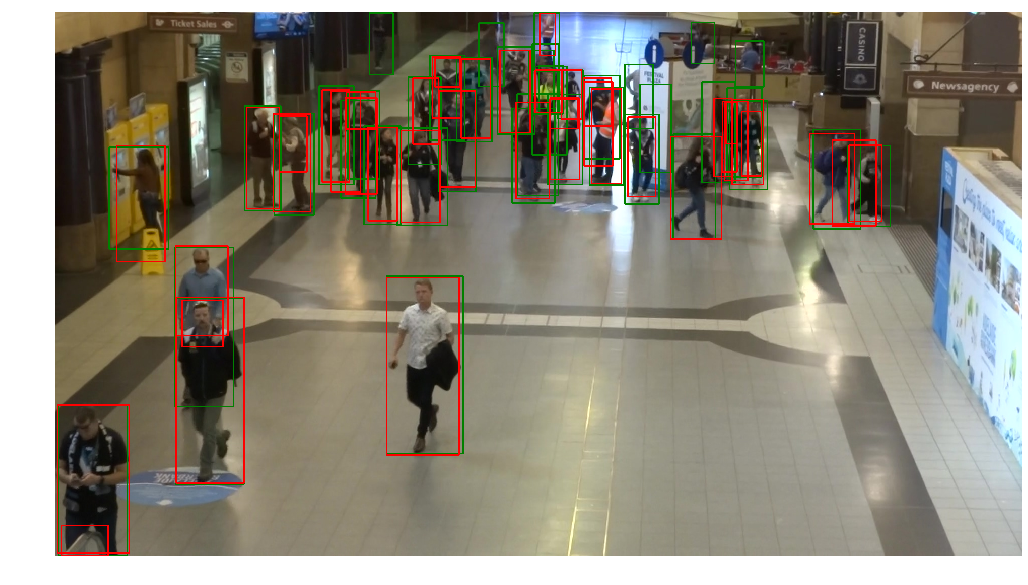

In [40]:
from visualize_all import plotFrame, plotImg

img = plotFrame('faster_rcnn', 'uma', 'MOT20', 'MOT20-02', 20)

plotImg(img)


## Usefull to check correlations

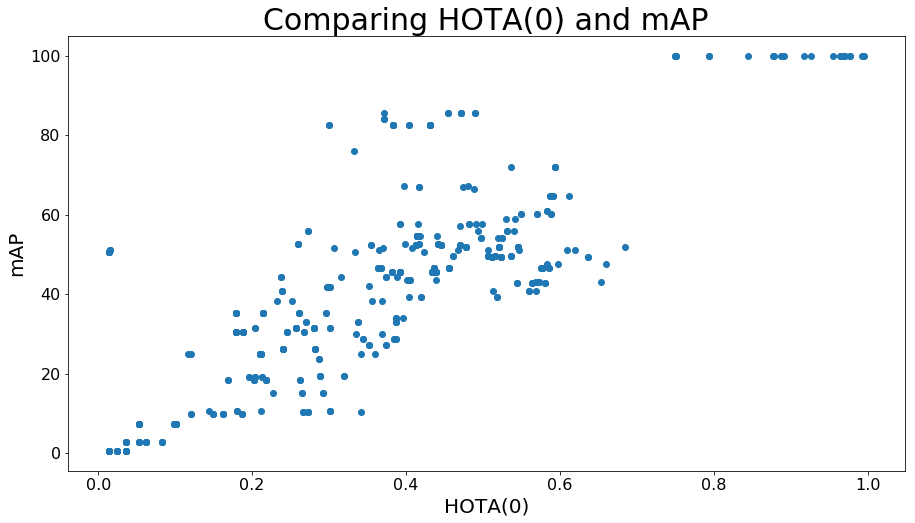

In [60]:
aux.dots_graph(accept, 'HOTA(0)', 'mAP', otype='all')

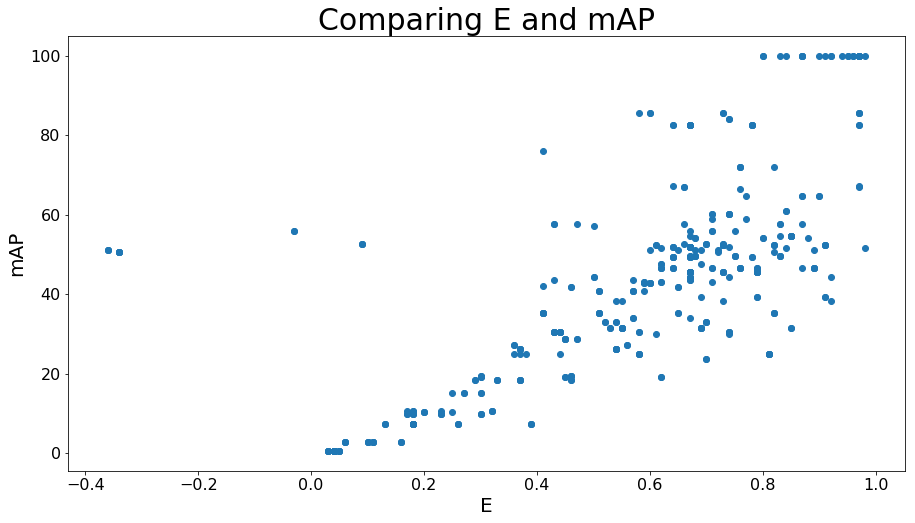

In [62]:
aux.dots_graph(accept, 'E', 'mAP', otype='all')

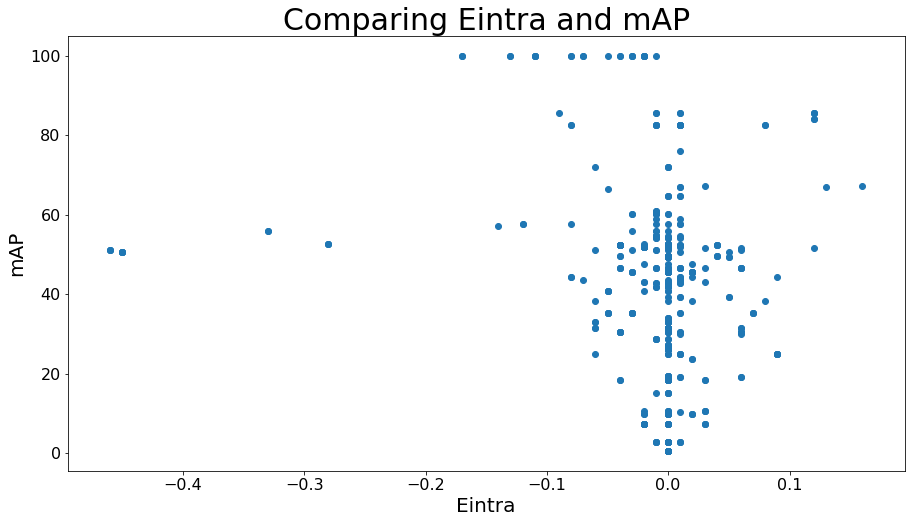

In [63]:
aux.dots_graph(accept, 'Eintra', 'mAP', otype='all')

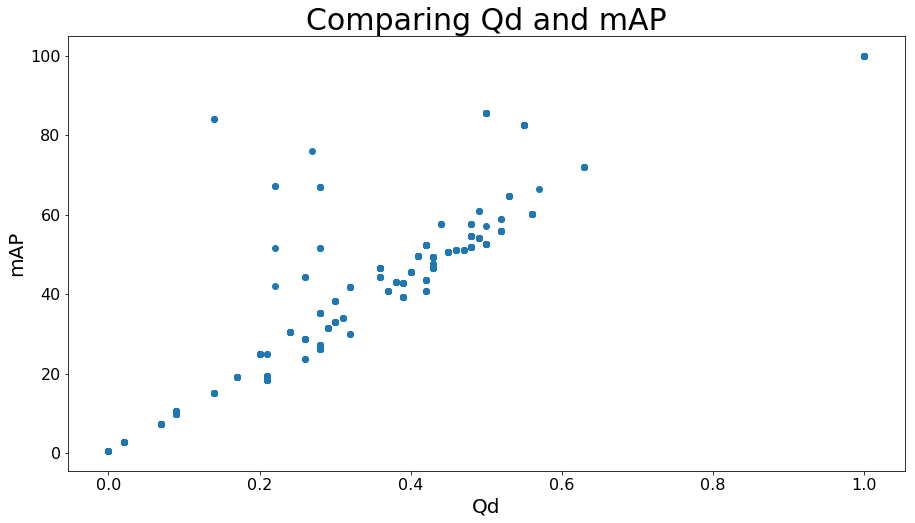

In [64]:
aux.dots_graph(accept, 'Qd', 'mAP', otype='all')

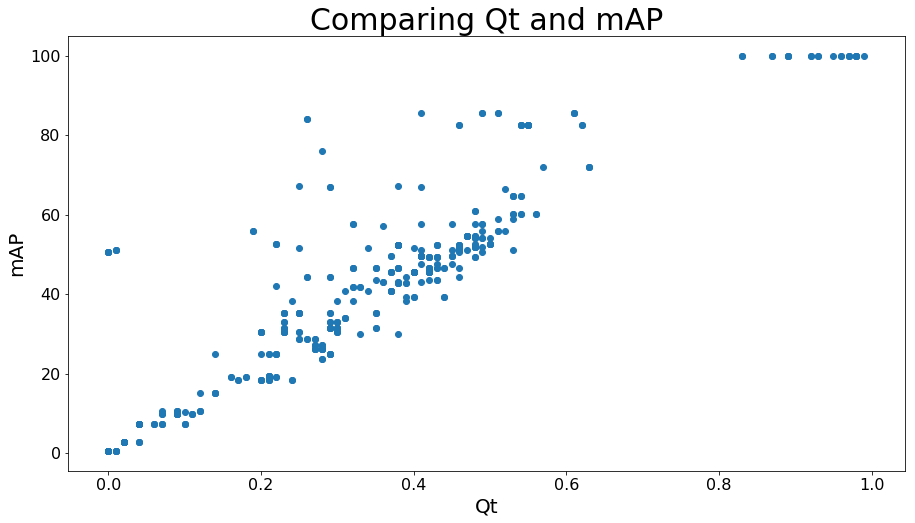

In [65]:
aux.dots_graph(accept, 'Qt', 'mAP', otype='all')

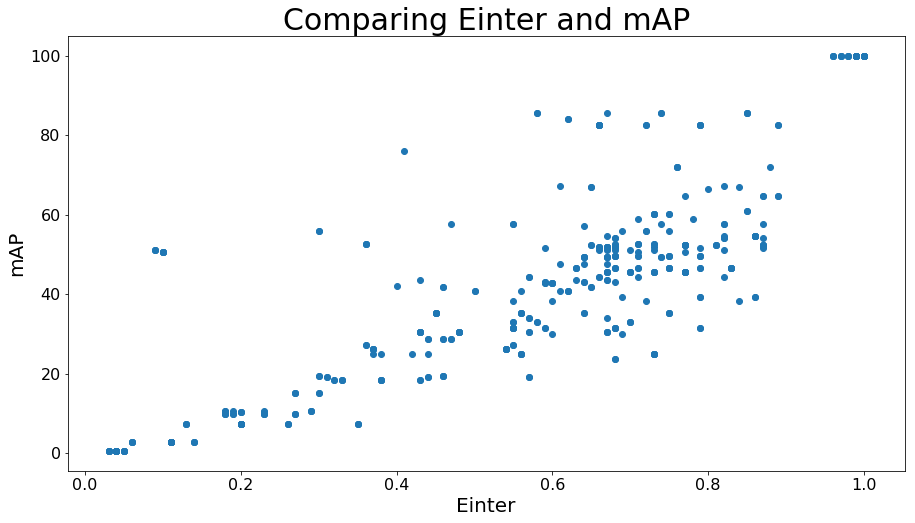

In [66]:
aux.dots_graph(accept, 'Einter', 'mAP', otype='all')

## Useful to study analysis of metrics.

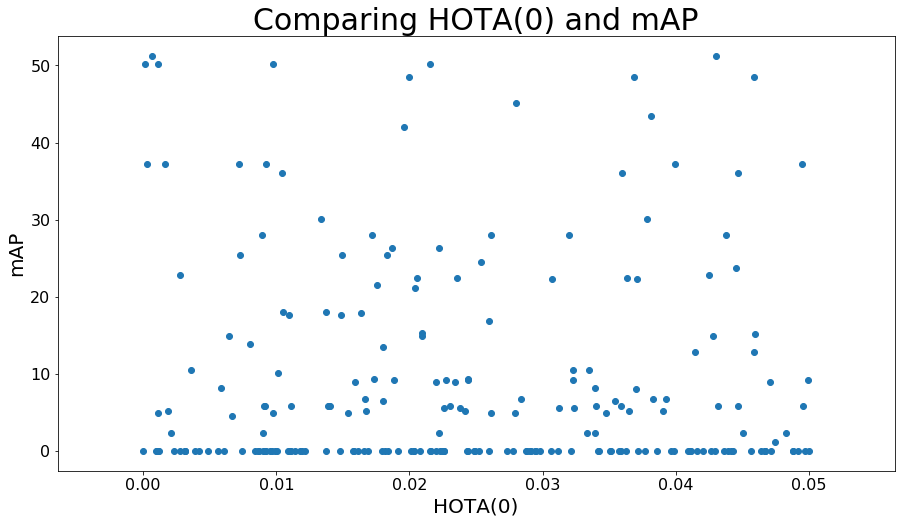

In [68]:
aux.dots_graph(accept, 'HOTA(0)', 'mAP', otype='diff')

## Histogram

Study of how the new metric performs.

In [32]:
# Some hyper parameters
n_bins = 20

# Update matplotlib fontsize
matplotlib.rcParams.update({'font.size': 16})

intra = anly.load_histogram('intra.csv')
Qd = anly.load_histogram('Qd.csv')
Qt = anly.load_histogram('Qt.csv')
Id = anly.load_histogram('Id.csv')
Nd = anly.load_histogram('Nd.csv')
It = anly.load_histogram('It.csv')
Nt = anly.load_histogram('Nt.csv')


inter = anly.load_histogram('inter.csv')
Y = anly.load_histogram('Y.csv')
C = anly.load_histogram('C.csv')
IDSW = anly.load_histogram('IDSW.csv')

### Intra-frame complexity

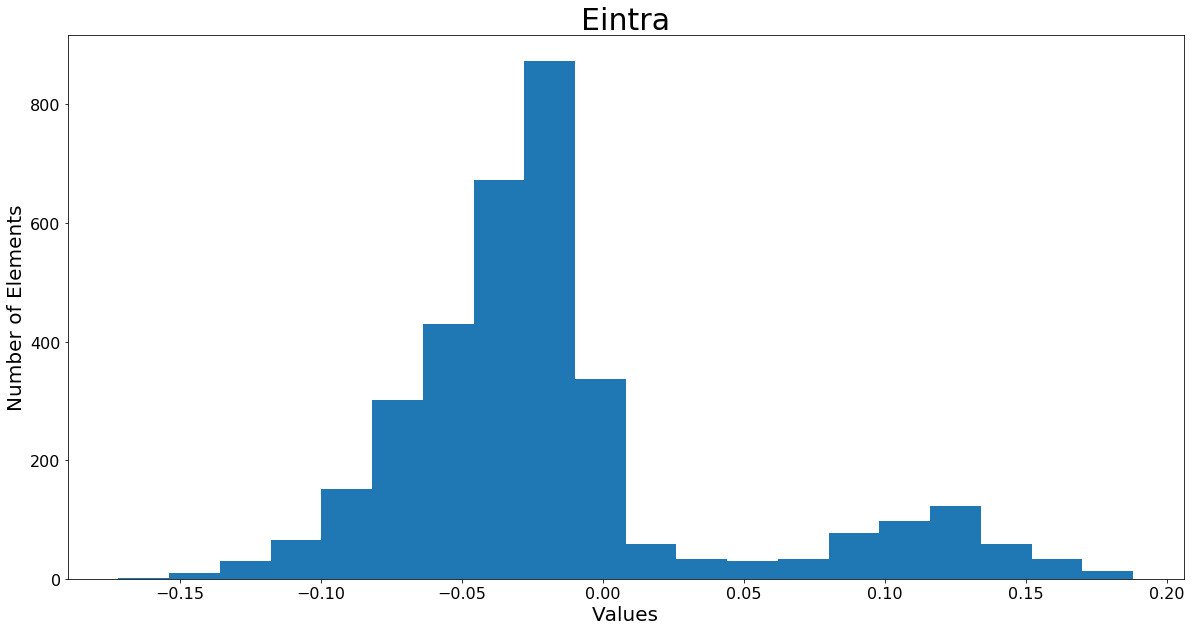

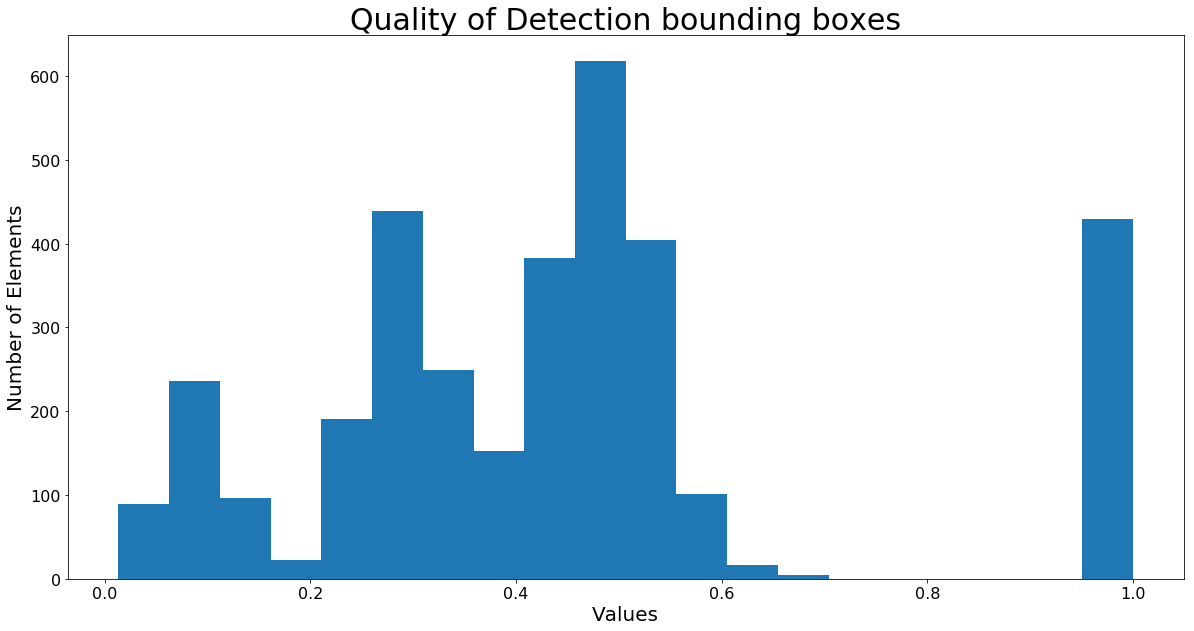

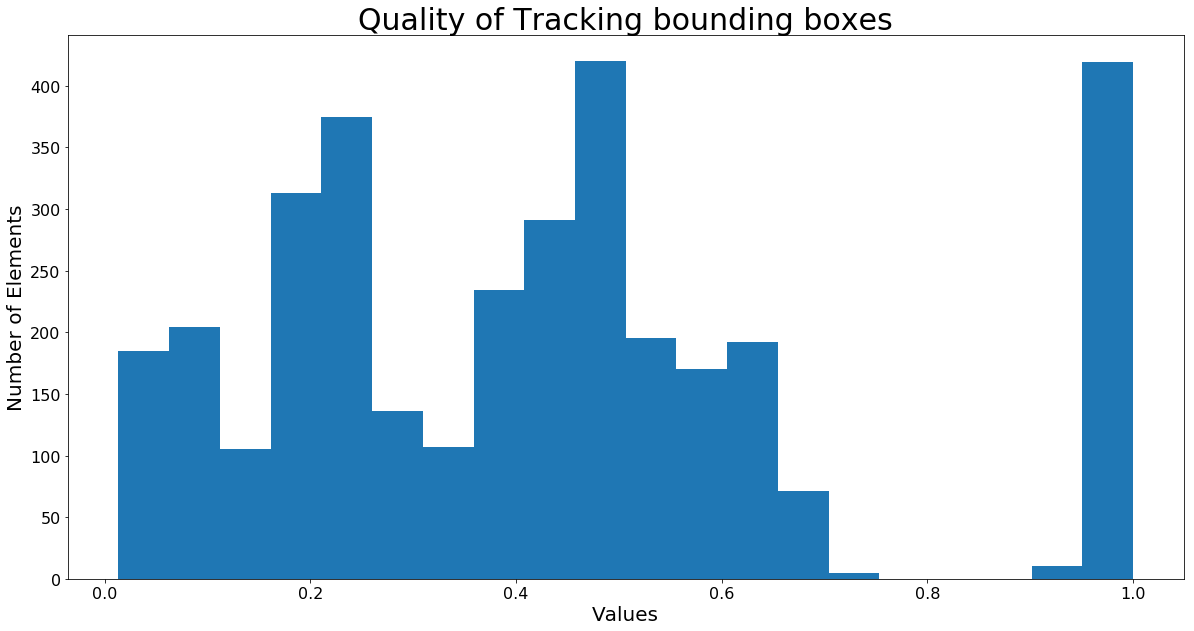

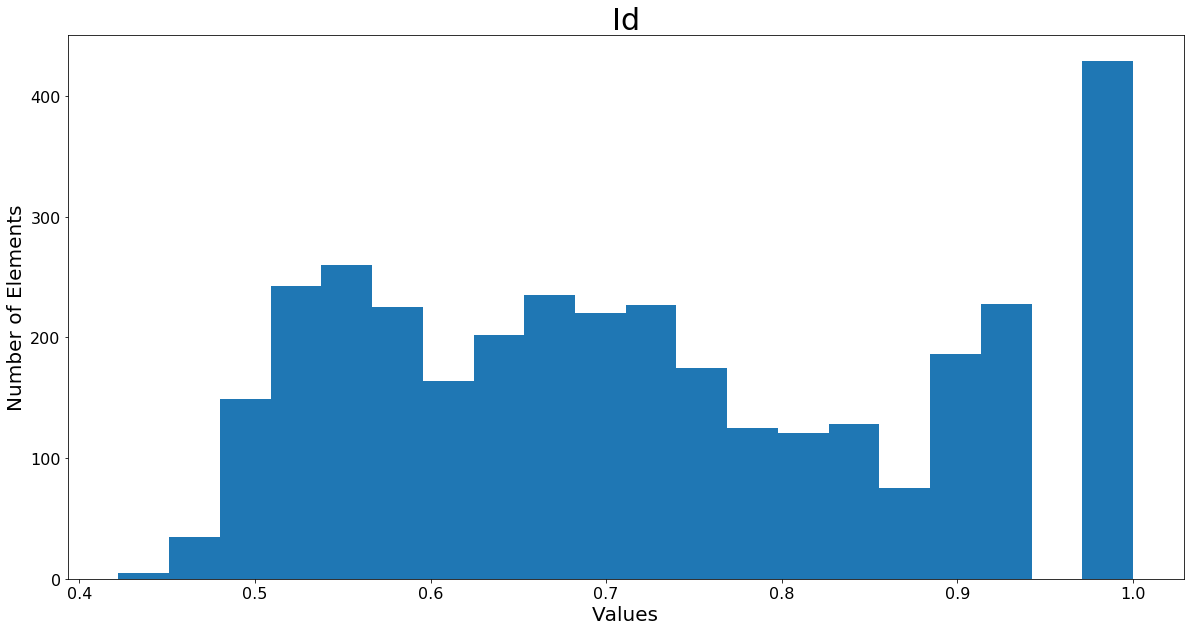

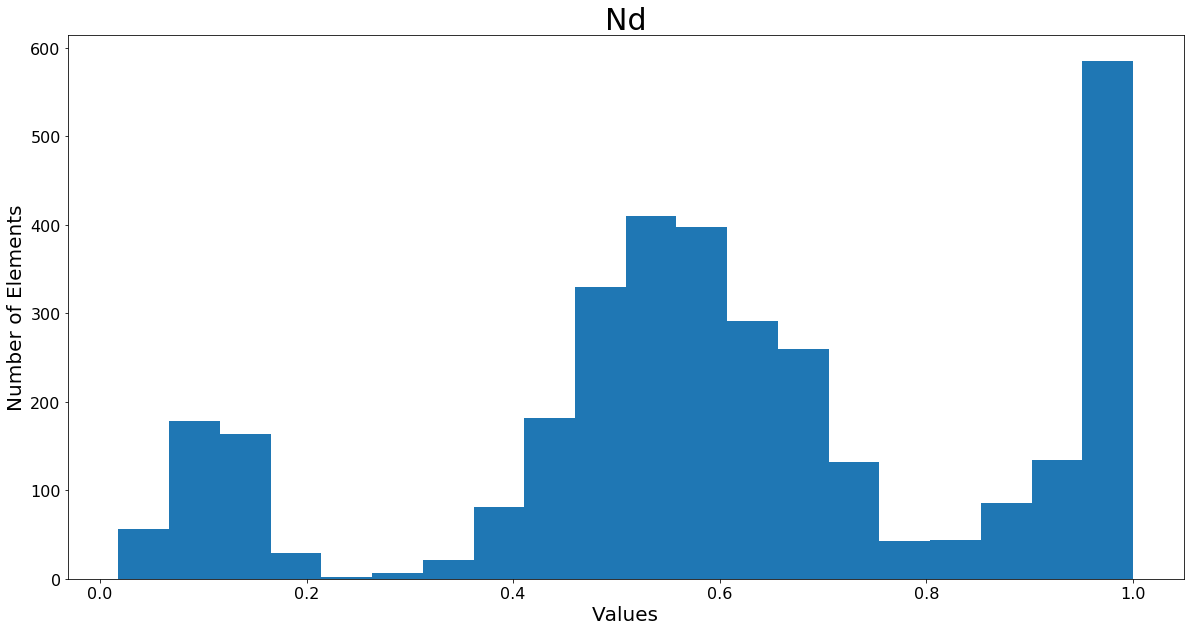

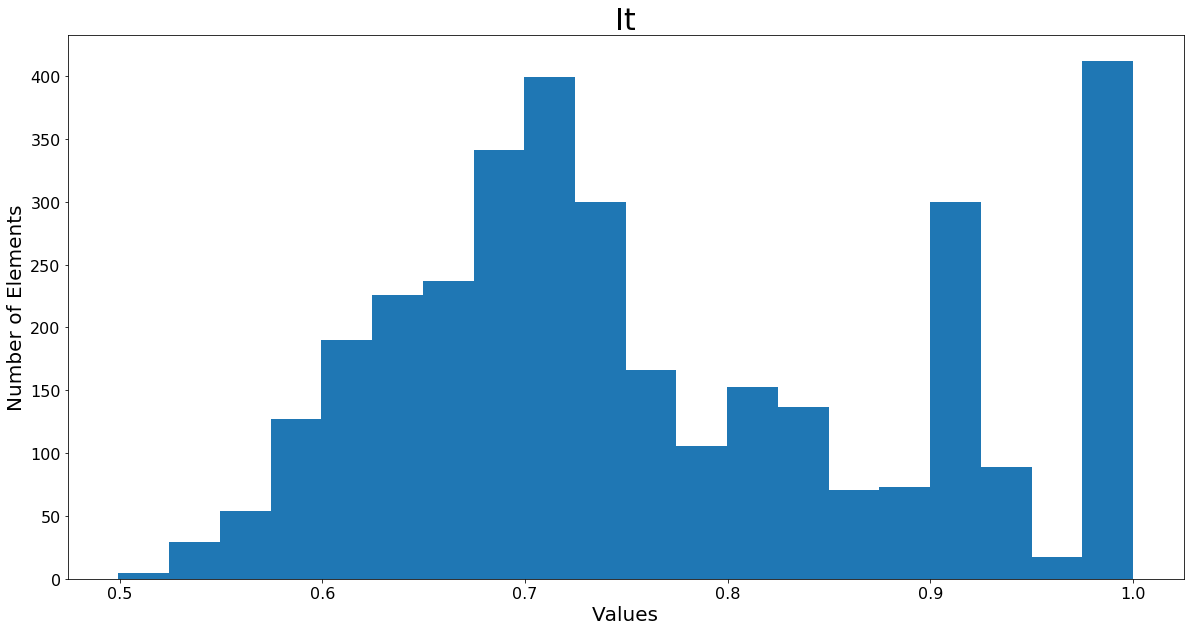

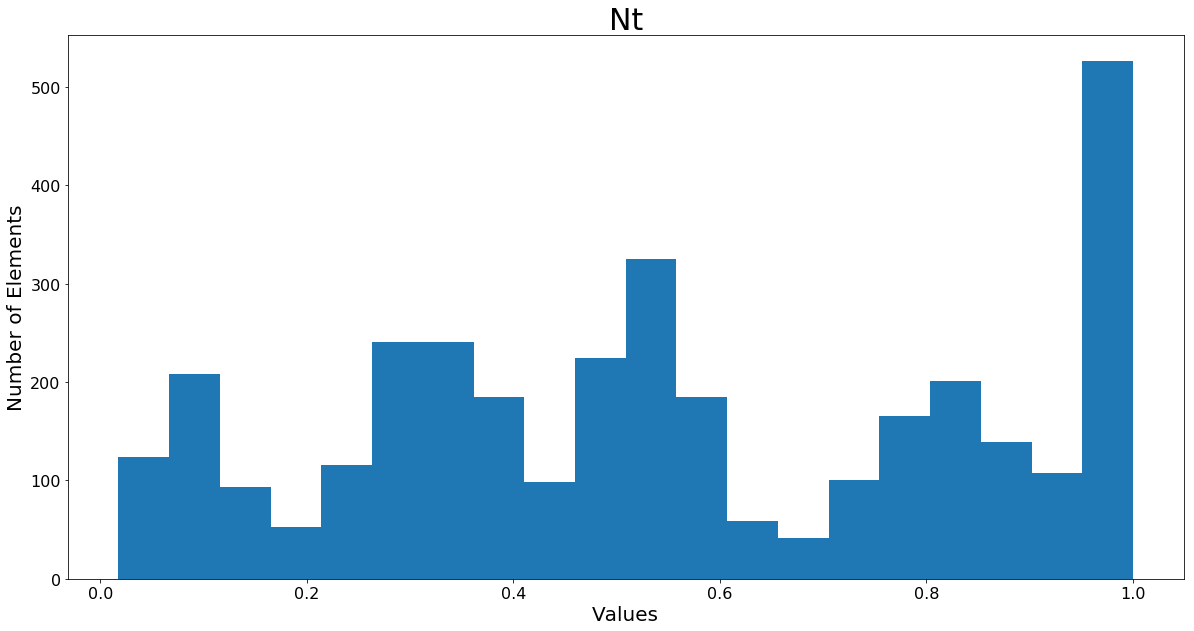

In [33]:
aux.plot_histogram(intra, n_bins, "Eintra")
aux.plot_histogram(Qd, n_bins, "Quality of Detection bounding boxes")
aux.plot_histogram(Qt, n_bins, "Quality of Tracking bounding boxes")
aux.plot_histogram(Id, n_bins, "Id")
aux.plot_histogram(Nd, n_bins, "Nd")
aux.plot_histogram(It, n_bins, "It")
aux.plot_histogram(Nt, n_bins, "Nt")

### Inter-frame complexity

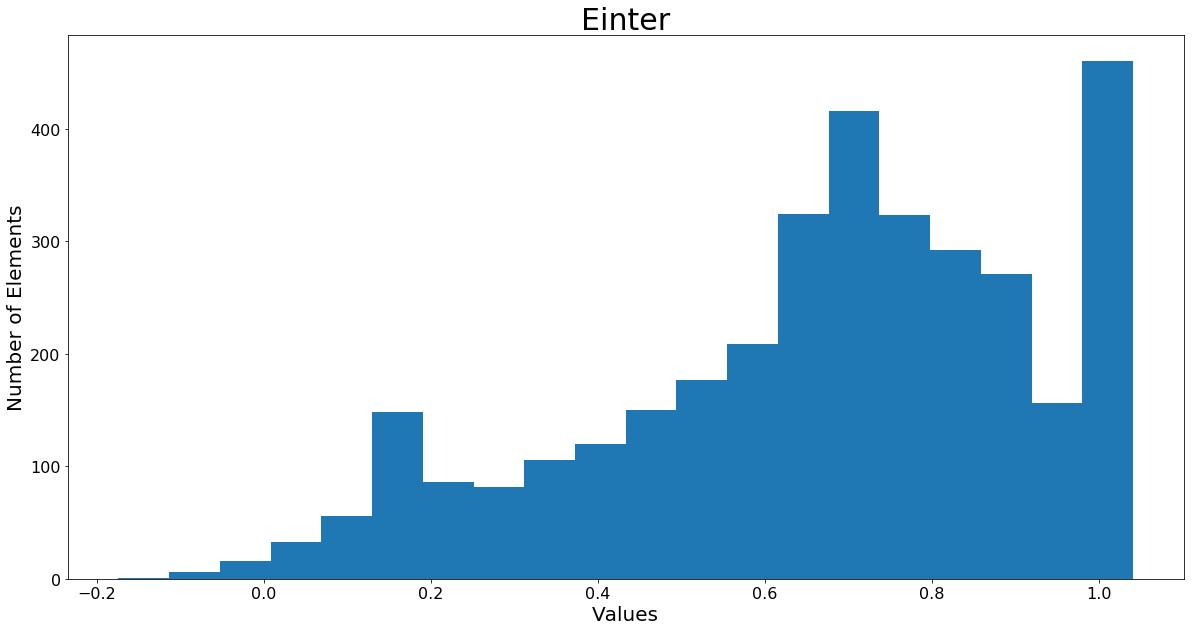

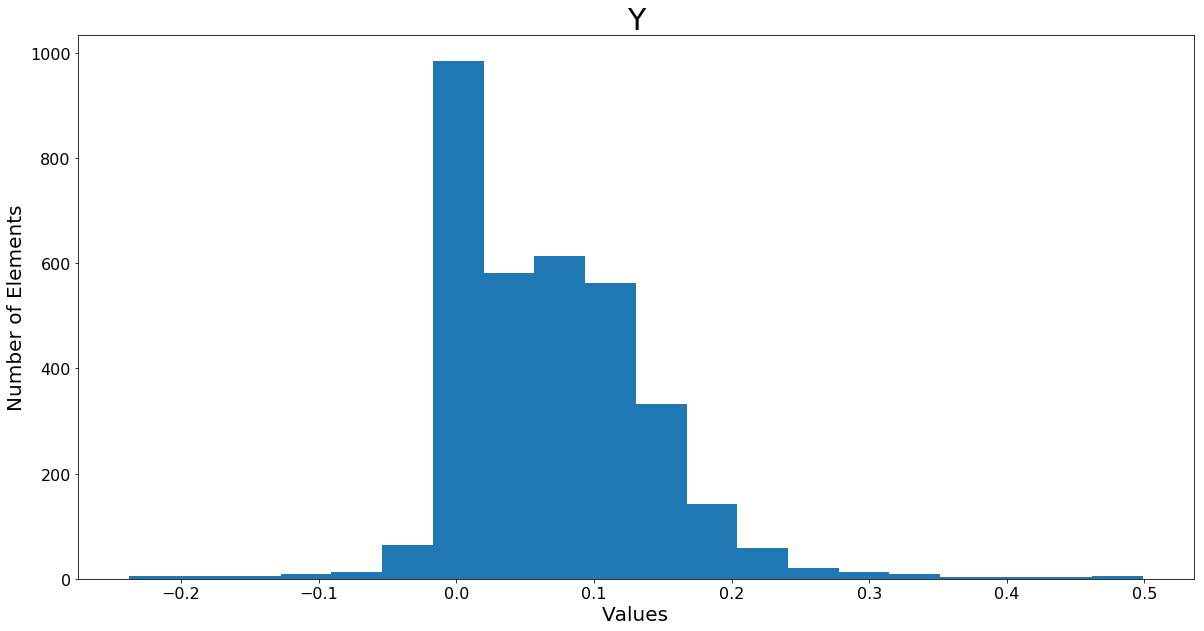

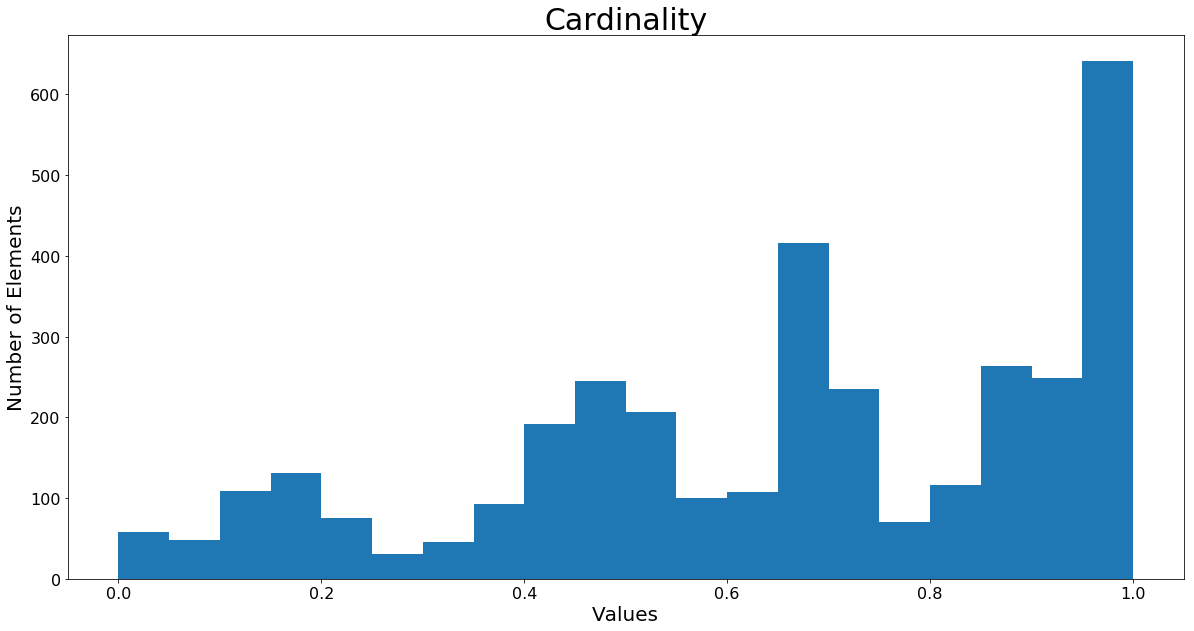

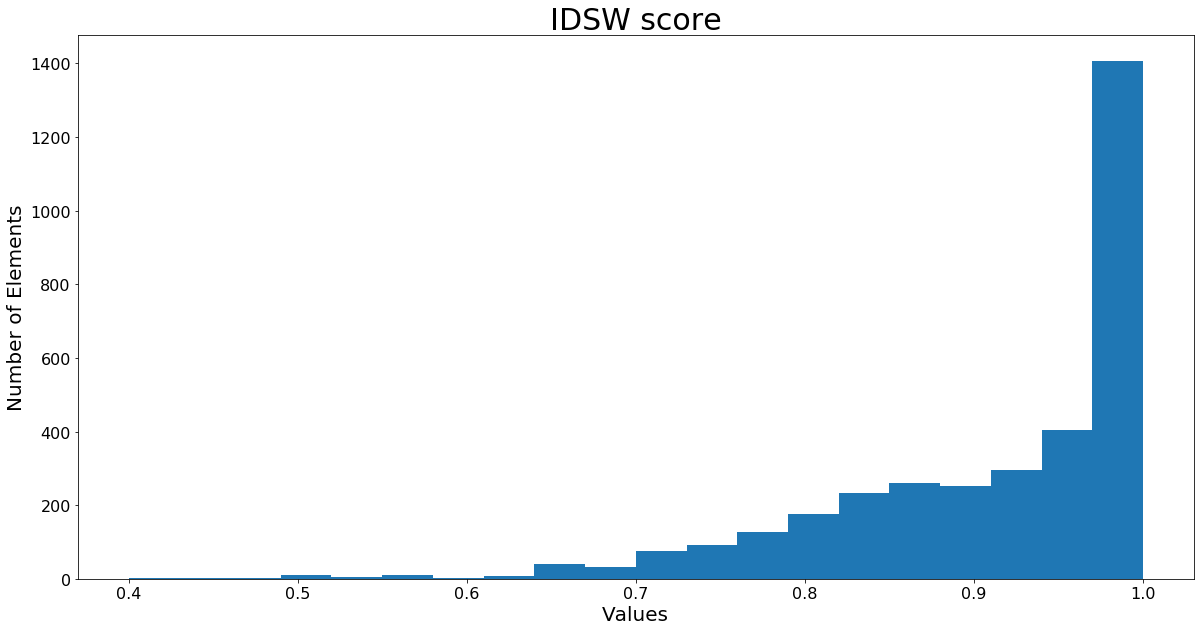

In [34]:
aux.plot_histogram(inter, n_bins, "Einter")
aux.plot_histogram(Y, n_bins, "Y")
aux.plot_histogram(C, n_bins, "Cardinality")
aux.plot_histogram(IDSW, n_bins, "IDSW score")